# Introdução

Notebook contendo os dados a serem apresentados na reunião de conjuntura internacional no dia 28/06/2019 em que foram apresentadas as seguintes hipóteses:

# Carregando pacotes

In [44]:
%config InlineBackend.figure_format = 'retina'

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
from matplotlib.ticker import FuncFormatter
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300
import seaborn as sns
import pandas_datareader.data as web
import datetime

start = datetime.datetime(1970,1,1)
end = datetime.datetime(2019,6,6)
sns.set_style('ticks')

import matplotlib.image as image
!rm "logo_CECON.png"
!wget https://raw.githubusercontent.com/iedados/Publico/master/logo_CECON.png

logo = "logo_CECON.png"
logo = image.imread(logo)

--2019-06-26 11:18:25--  https://raw.githubusercontent.com/iedados/Publico/master/logo_CECON.png
Resolvendo raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.92.133
Conectando-se a raw.githubusercontent.com (raw.githubusercontent.com)|151.101.92.133|:443... conectado.
A requisição HTTP foi enviada, aguardando resposta... 200 OK
Tamanho: 127044 (124K) [image/png]
Salvando em: “logo_CECON.png”

logo_CECON.png      100%[===================>] 124,07K  --.-KB/s    em 0,04s   

2019-06-26 11:18:26 (3,14 MB/s) - “logo_CECON.png” salvo [127044/127044]



# PIB norte americano

In [17]:
df = web.DataReader(
    [
        'GDPC1',  # Real GDP
        'PCEC96',  # Real Personal Consumption Expenditures Billions of Chained 2012 Dollars, Seasonally Adjusted Annual Rate
        'GPDIC1',  # Real Gross Private Domestic Investment Billions of Chained 2012 Dollars, Seasonally Adjusted Annual Rate
        'NETEXP',  # Net Exports of Goods and Services Billions of Dollars
        'GCEC1',  # Real Government Consumption Expenditures and Gross Investment Billions of Chained 2012 Dollars, Seasonally Adjusted Annual Rate
    ],
    'fred',
    start,
    end)
df.columns = [
    "PIB", "Consumo", "Investimento", 'Exportações líquidas',
    'Gastos do governo'
]
df = df.resample('QS').mean()
df = df.dropna()
df.index.name = ''

In [20]:
(df.pct_change(4).round(3)*100).tail()

PIB  Consumo  Investimento  Exportações líquidas  \
                                                               
2018-01-01  2.6      2.4           6.1                  10.9   
2018-04-01  2.9      2.6           4.6                  -3.9   
2018-07-01  3.0      2.9           6.1                  17.3   
2018-10-01  3.0      2.6           6.8                   8.4   
2019-01-01  3.2      2.8           5.5                  -5.0   

            Gastos do governo  
                               
2018-01-01                0.7  
2018-04-01                1.3  
2018-07-01                2.3  
2018-10-01                1.5  
2019-01-01                1.8

In [16]:
(df.pct_change().round(3)*100).tail()

PIB  Consumo  Investimento  Exportações líquidas  \
                                                               
2018-01-01  0.5      0.1           2.3                   5.1   
2018-04-01  1.0      0.9          -0.1                 -14.0   
2018-07-01  0.8      0.9           3.6                  18.9   
2018-10-01  0.5      0.6           0.9                   0.8   
2019-01-01  0.8      0.3           1.1                  -7.9   

            Gastos do governo  
                               
2018-01-01                0.4  
2018-04-01                0.6  
2018-07-01                0.6  
2018-10-01               -0.1  
2019-01-01                0.6

## Contribuição para a variação

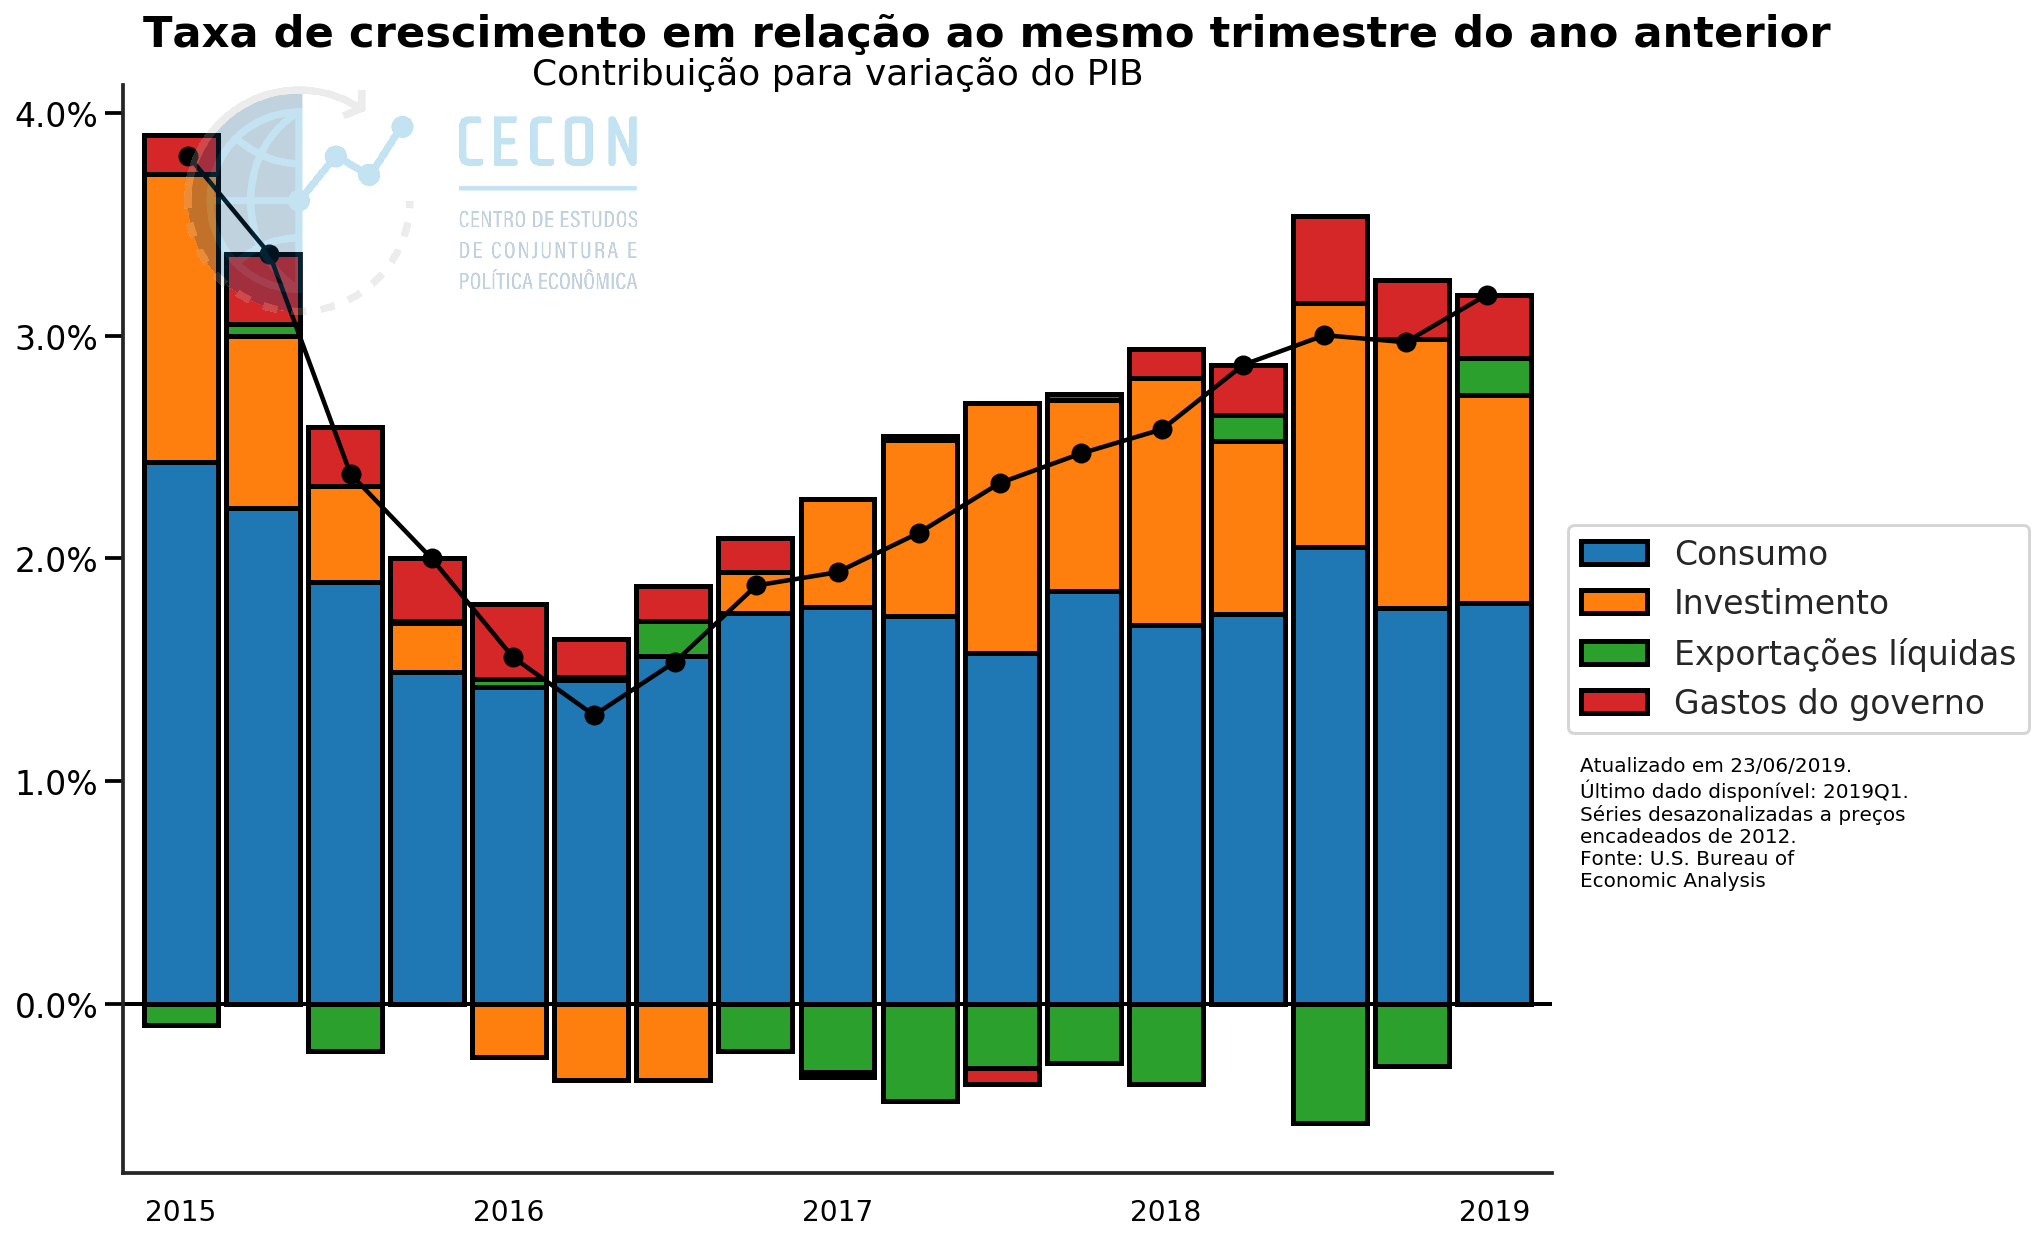

In [2]:
sns.set_context('talk')
fim = 17
periodo = len(df["PIB"]["2002"])
fig, ax = plt.subplots(figsize=(20, 16))

contribuicao = (df.drop("PIB", axis='columns').diff(
    periodo).apply(lambda x: x / (df["PIB"].shift(periodo))).tail(fim))
soma = df.drop("PIB", axis='columns').diff(periodo).apply(lambda x: x / (df[
    "PIB"].shift(periodo))).tail(fim).sum(axis=1)

contribuicao.apply(lambda x: (x / soma) * df["PIB"].pct_change(periodo).tail(
    fim)).plot(
        kind='bar',
        stacked=True,
        ax=ax,
        width=0.9,
        # cmap="RdYlGn",
        edgecolor='black',
        linewidth=2.5,
        figsize=(16, 10),
        zorder=1)

ax.axhline(y=0, color='black', linestyle='-', lw=2)

axl = ax.twiny()
axl.plot(ax.get_xticks(),
         df["PIB"].pct_change(periodo).tail(fim),
         marker='o',
         ls='-',
         color='black',
         label='PIB')

axl.axis('off')

# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.suptitle(
    'Taxa de crescimento em relação ao mesmo trimestre do ano anterior',
    color='black',
    weight='bold',
    y=.93)

ax.set_title('Contribuição para variação do PIB', color='black', y=.99)

ax.text(1.02,
        0.26,
        'Fonte: U.S. Bureau of \nEconomic Analysis',
        verticalalignment='bottom',
        horizontalalignment='left',
        transform=ax.transAxes,
        color='black',
        fontsize=10)
ax.text(1.02,
        0.3,
        'Atualizado em {}. \nÚltimo dado disponível: {}. \nSéries {}.'.format(
            datetime.datetime.now().strftime("%d/%m/%Y"),
            df.index[-1].to_period('Q'),
            "desazonalizadas a preços \nencadeados de 2012"),
        verticalalignment='bottom',
        horizontalalignment='left',
        transform=ax.transAxes,
        color='black',
        fontsize=10)

ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')
ax.yaxis.label.set_color('black')
ax.xaxis.label.set_color('black')
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.1%}'.format(y)))

labels = [i.strftime("%Y") for i in df.tail(fim).index]
dates = ["" for i in df.tail(fim).index]

for i in range(len(dates)):

    if i % 4 == 0:
        dates[i] = labels[i]

ax.tick_params(axis='x', which='minor', width=1)

ax.xaxis.set_ticklabels(dates,
                        fontsize=14,
                        minor=False,
                        rotation=0,
                        color='black')
ax.xaxis.set_ticks_position('none')

ax2 = fig.add_axes([0.15, 0.7, 0.2, 0.2], zorder=0)
ax2.imshow(logo, aspect='equal', zorder=0, alpha=.25)

ax2.axis('off')

sns.despine()
fig.savefig(
    'Contrib_Var_AnoAnterior.png',
    bbox_inches='tight',
    dpi=300,
    pad_inches=0.05
)
plt.show()

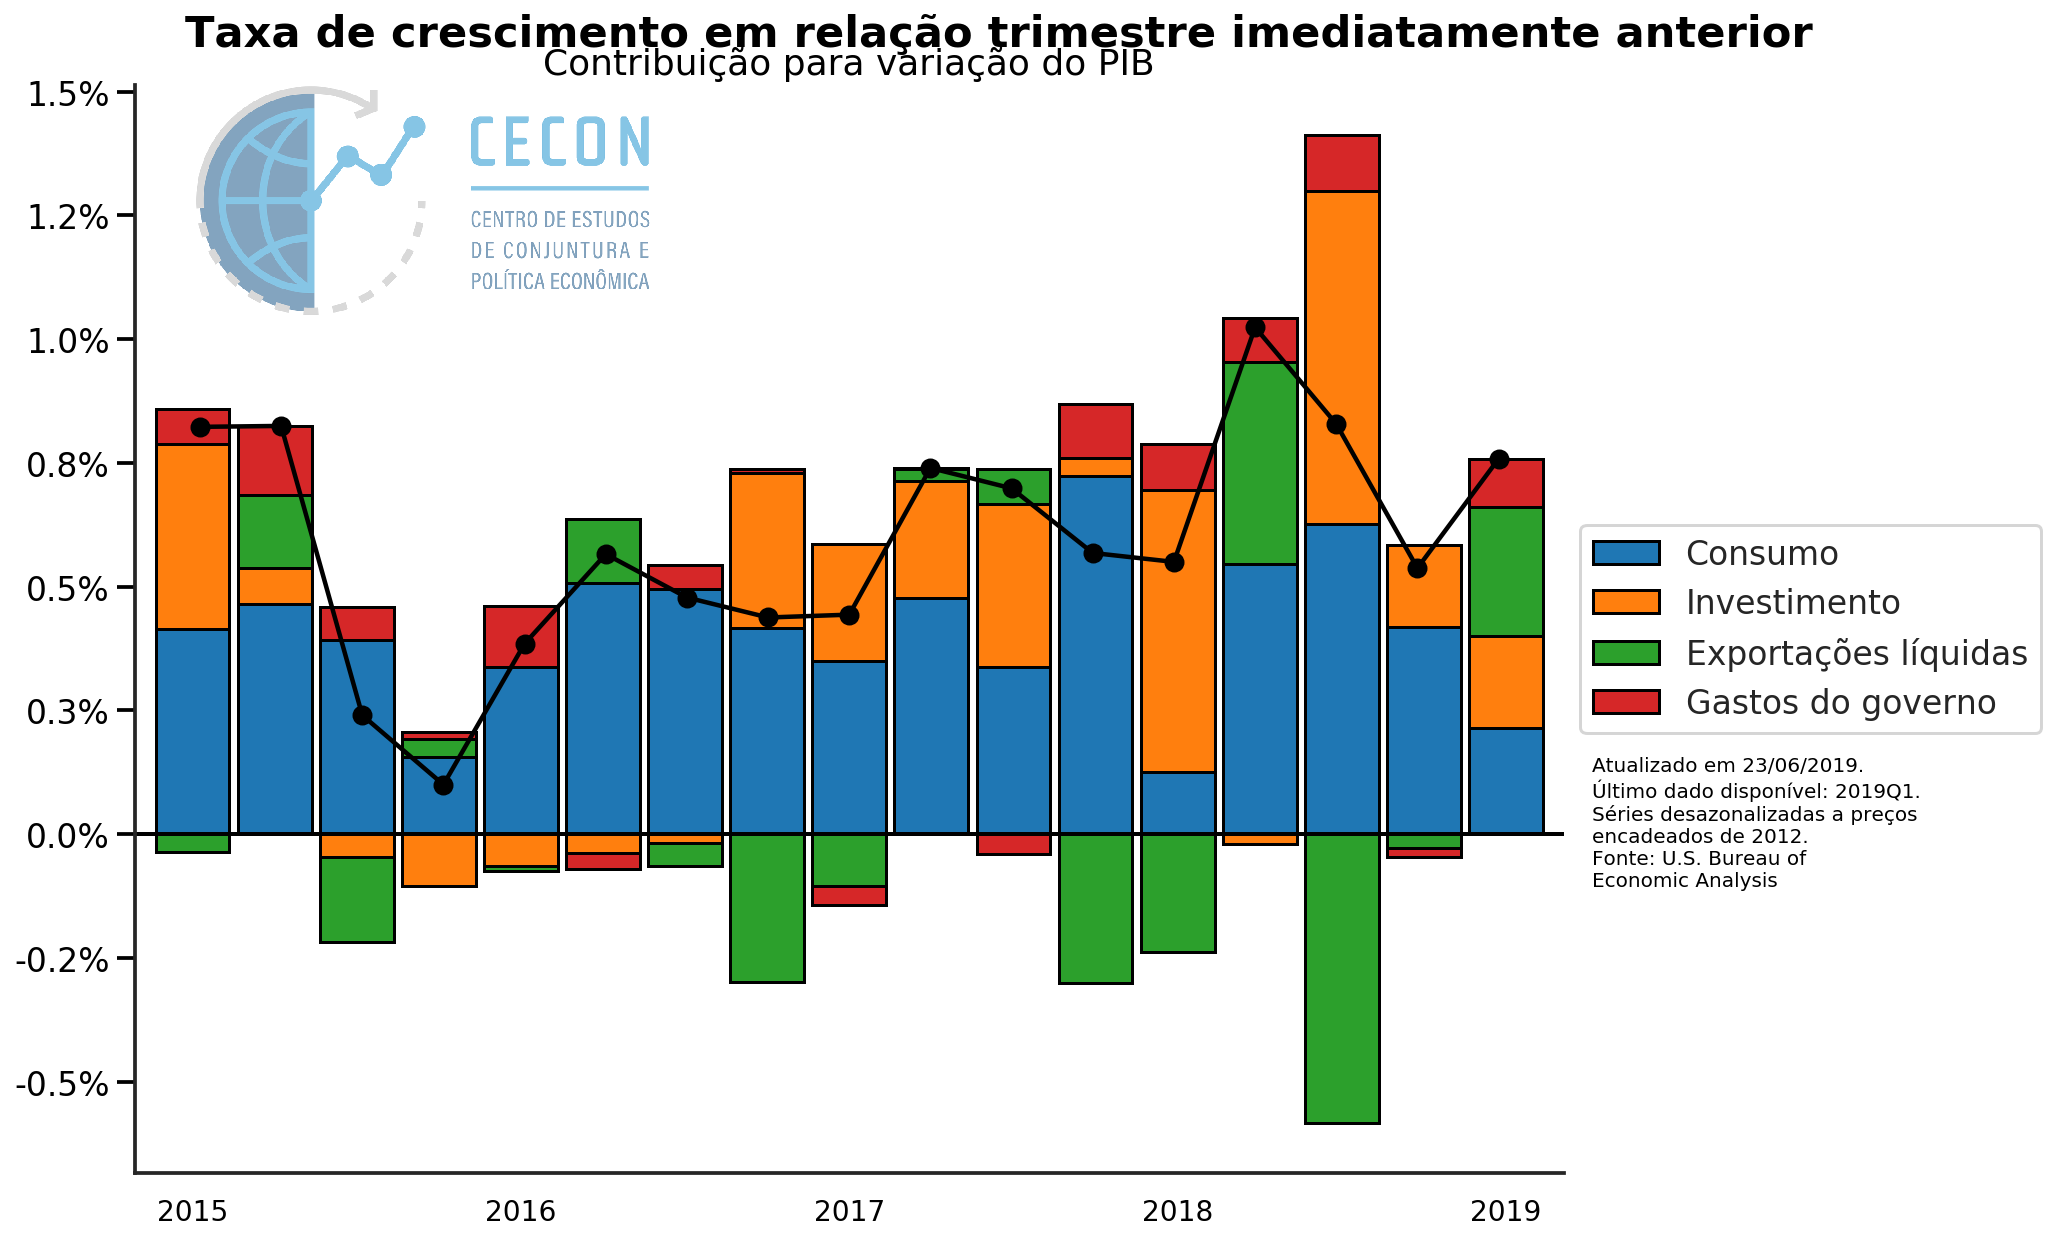

In [3]:
sns.set_context('talk')
fim = 17
periodo = 1
fig, ax = plt.subplots()

contribuicao = (df.drop("PIB", axis='columns').diff(
    periodo).apply(lambda x: x / (df["PIB"].shift(periodo))).tail(fim))
soma = df.drop("PIB", axis='columns').diff(periodo).apply(lambda x: x / (df[
    "PIB"].shift(periodo))).tail(fim).sum(axis=1)

contribuicao.apply(lambda x: (x / soma) * df["PIB"].pct_change(periodo).tail(
    fim)).plot(
        kind='bar',
        stacked=True,
        ax=ax,
        width=0.9,
        # cmap="RdYlGn",
        edgecolor='black',
        figsize=(16, 10),
        zorder=1)

ax.axhline(y=0, color='black', linestyle='-', lw=2)

axl = ax.twiny()
axl.plot(ax.get_xticks(),
         df["PIB"].pct_change(periodo).tail(fim),
         marker='o',
         ls='-',
         color='black',
         label='PIB')

axl.axis('off')

# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.suptitle(
    'Taxa de crescimento em relação trimestre imediatamente anterior',
    color='black',
    weight='bold',
    y=.93)

ax.set_title('Contribuição para variação do PIB', color='black', y=.999)

ax.text(1.02,
        0.26,
        'Fonte: U.S. Bureau of \nEconomic Analysis',
        verticalalignment='bottom',
        horizontalalignment='left',
        transform=ax.transAxes,
        color='black',
        fontsize=10)
ax.text(1.02,
        0.3,
        'Atualizado em {}. \nÚltimo dado disponível: {}. \nSéries {}.'.format(
            datetime.datetime.now().strftime("%d/%m/%Y"),
            df.index[-1].to_period('Q'),
            "desazonalizadas a preços \nencadeados de 2012"),
        verticalalignment='bottom',
        horizontalalignment='left',
        transform=ax.transAxes,
        color='black',
        fontsize=10)

ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')
ax.yaxis.label.set_color('black')
ax.xaxis.label.set_color('black')
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.1%}'.format(y)))

labels = [i.strftime("%Y") for i in df.tail(fim).index]
dates = ["" for i in df.tail(fim).index]

for i in range(len(dates)):

    if i % 4 == 0:
        dates[i] = labels[i]

ax.tick_params(axis='x', which='minor', width=1)

ax.xaxis.set_ticklabels(dates,
                        fontsize=14,
                        minor=False,
                        rotation=0,
                        color='black')
ax.xaxis.set_ticks_position('none')

ax2 = fig.add_axes([0.15, 0.7, 0.2, 0.2])
ax2.imshow(logo, aspect='equal', zorder=0, alpha=.5)

ax2.axis('off')

sns.despine()
fig.savefig(
    'Contrib_Var_TrimAnterior.png',
    bbox_inches='tight', 
    dpi=300,
    pad_inches=0.05
)
plt.show()

## Taxa de desemprego

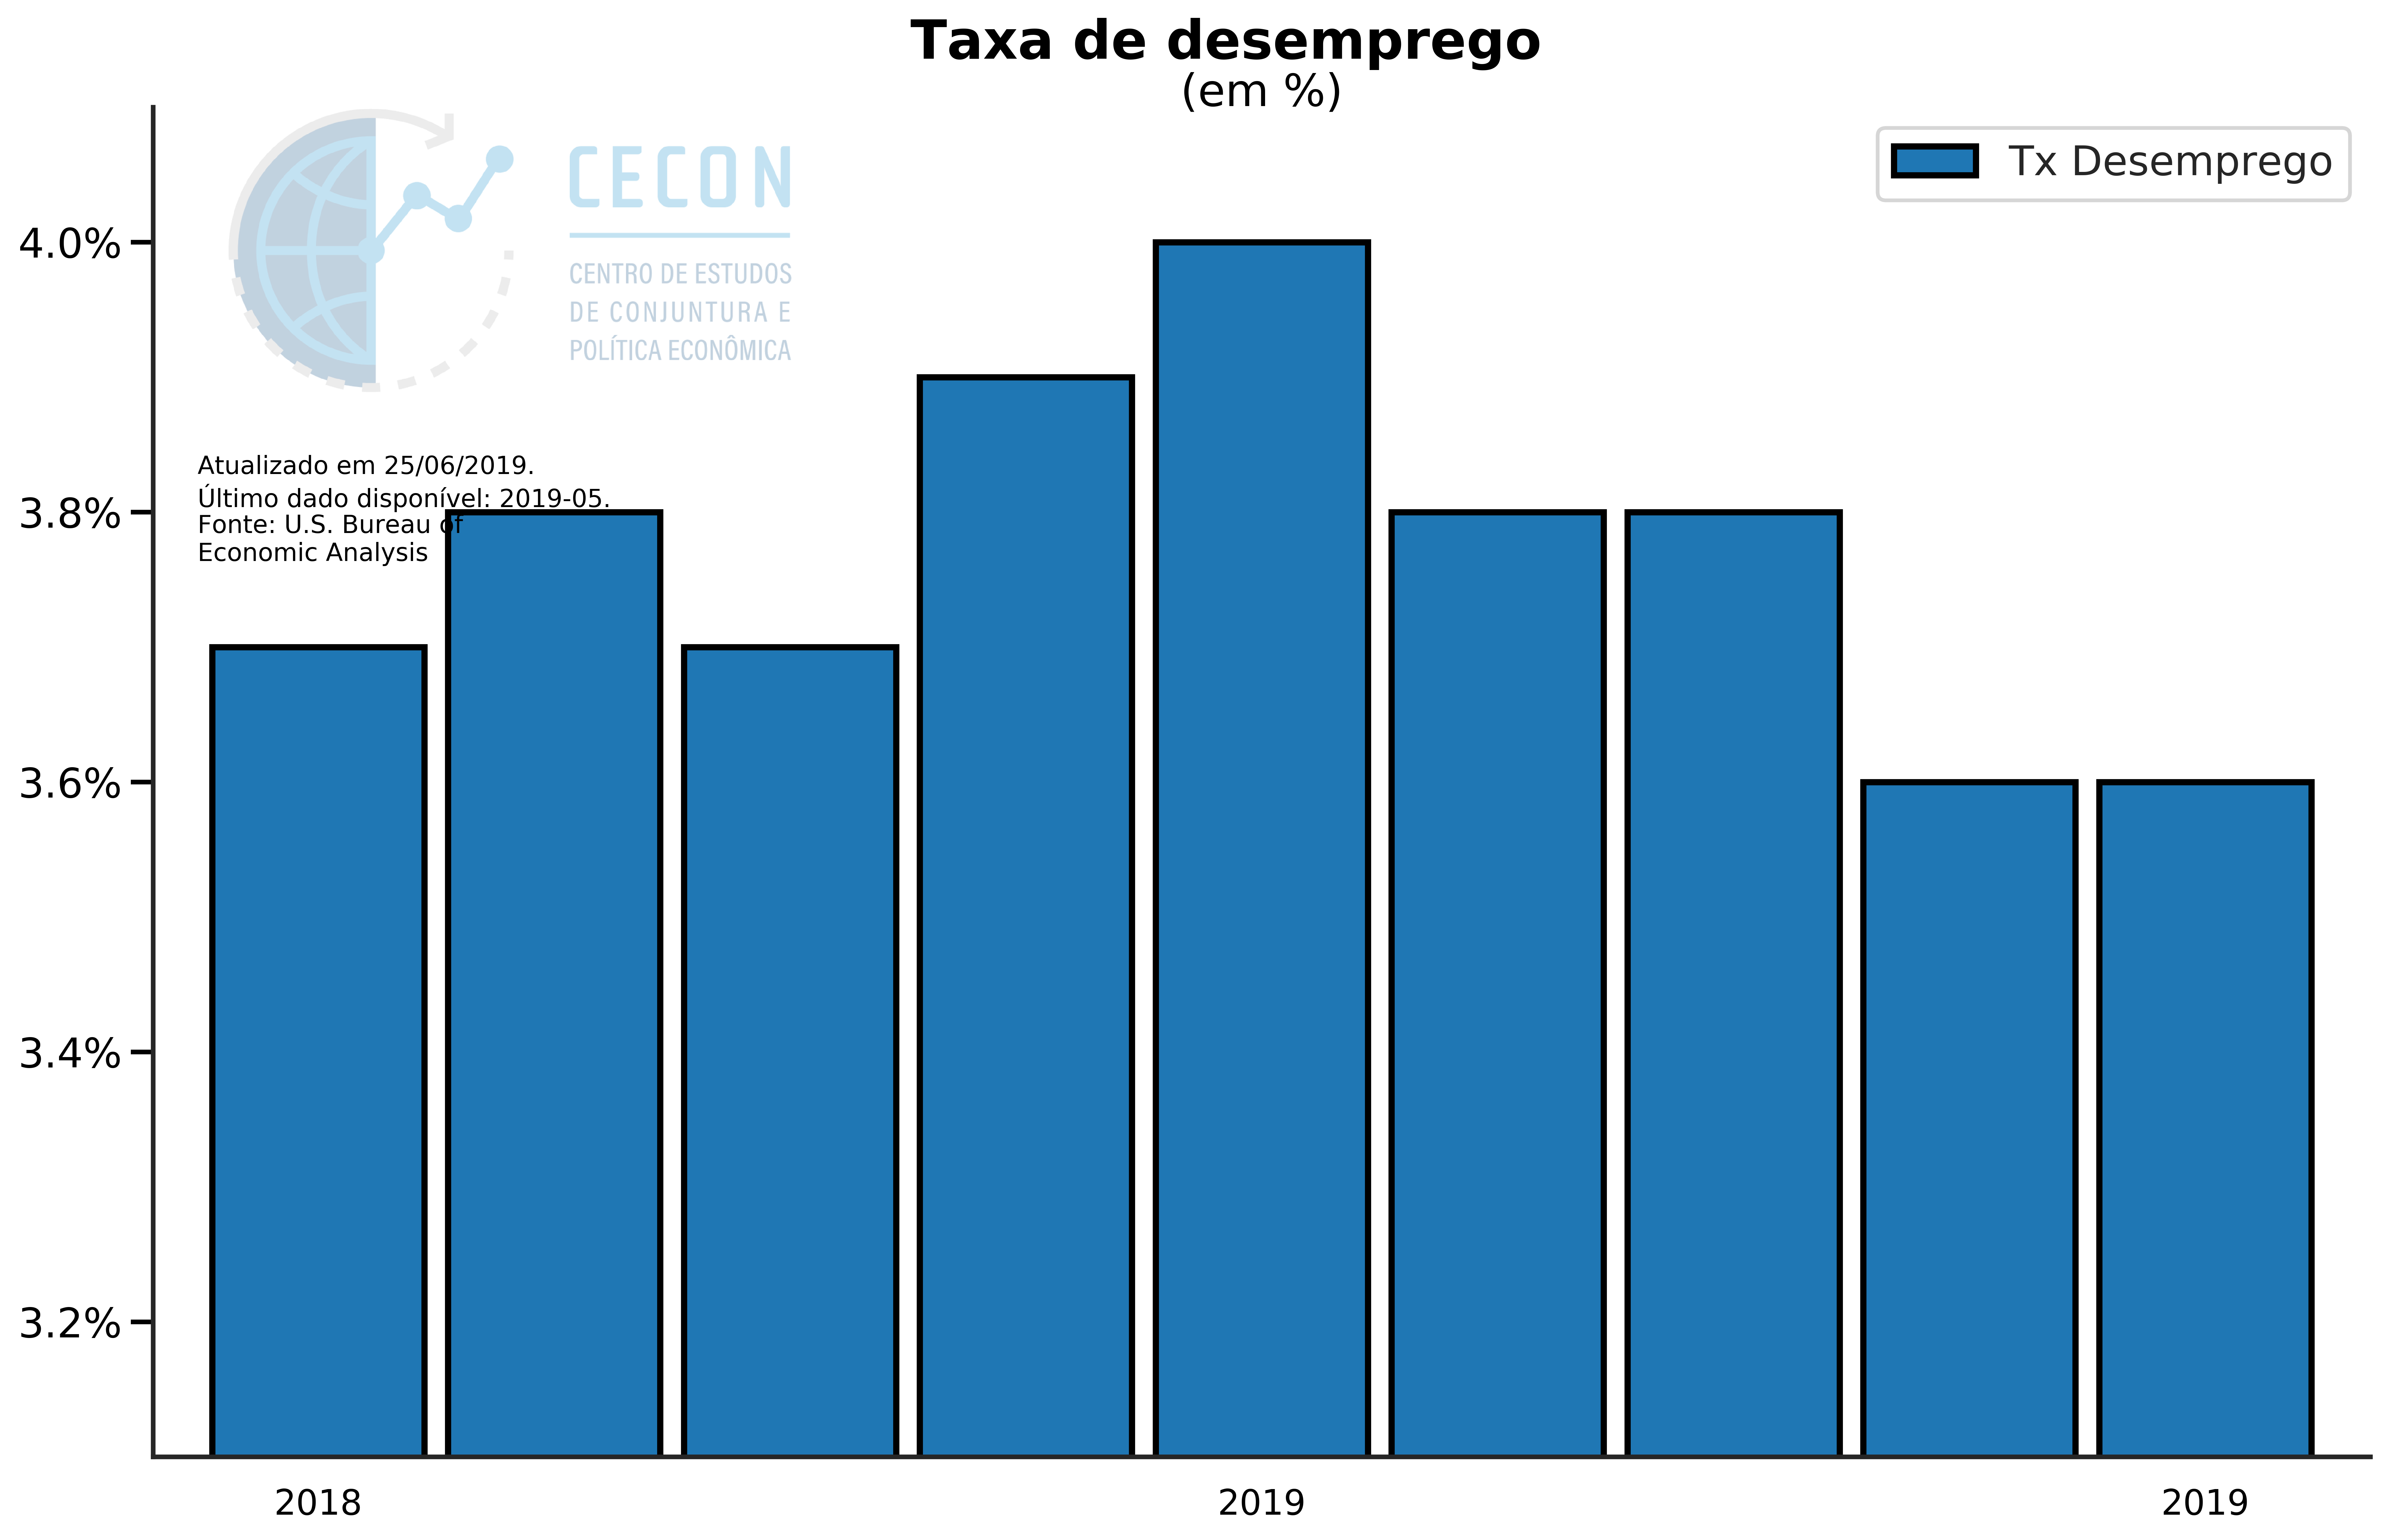

In [33]:
df = web.DataReader(
    [
        'UNRATE'
    ],
    'fred',
    start,
    end)
df.columns = [
    "Tx Desemprego",
]
df.index.name = ''
df = df/100

sns.set_context('talk')
fim = 4*2+1
periodo = len(df["2002"])
fig, ax = plt.subplots(figsize=(20, 16))

df.tail(fim).plot(
    kind='bar',
    ax=ax,
    width=0.9,
    edgecolor='black',
    linewidth=2.5,
    figsize=(16, 10),
    zorder=1)

plt.suptitle(
    'Taxa de desemprego', 
    color='black',
    weight='bold',
    y=.93)

ax.set_title(
    '(em %)', 
    color='black',
    y=.99)

ax.text(.02,
        0.66,
        'Fonte: U.S. Bureau of \nEconomic Analysis',
        verticalalignment='bottom',
        horizontalalignment='left',
        transform=ax.transAxes,
        color='black',
        fontsize=10)
ax.text(.02,
        0.7,
        'Atualizado em {}. \nÚltimo dado disponível: {}.'.format(
            datetime.datetime.now().strftime("%d/%m/%Y"),
            df.index[-1].to_period('M')),
        verticalalignment='bottom',
        horizontalalignment='left',
        transform=ax.transAxes,
        color='black',
        fontsize=10)

ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')
ax.yaxis.label.set_color('black')
ax.xaxis.label.set_color('black')
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.1%}'.format(y)))
ax.set_ylim(0.031,0.041)

labels = [i.strftime("%Y") for i in df.tail(fim).index]
dates = ["" for i in df.tail(fim).index]

for i in range(len(dates)):

    if i % 4 == 0:
        dates[i] = labels[i]

ax.tick_params(axis='x', which='minor', width=1)

ax.xaxis.set_ticklabels(dates,
                        fontsize=14,
                        minor=False,
                        rotation=0,
                        color='black')
ax.xaxis.set_ticks_position('none')

ax2 = fig.add_axes([0.15, 0.7, 0.2, 0.2], zorder=0)
ax2.imshow(logo, aspect='equal', zorder=0, alpha=.25)

ax2.axis('off')

sns.despine()
fig.savefig(
    'Desemprego.png',
    bbox_inches='tight',
    dpi=300,
    pad_inches=0.05
)
plt.show()

## Produção industrial

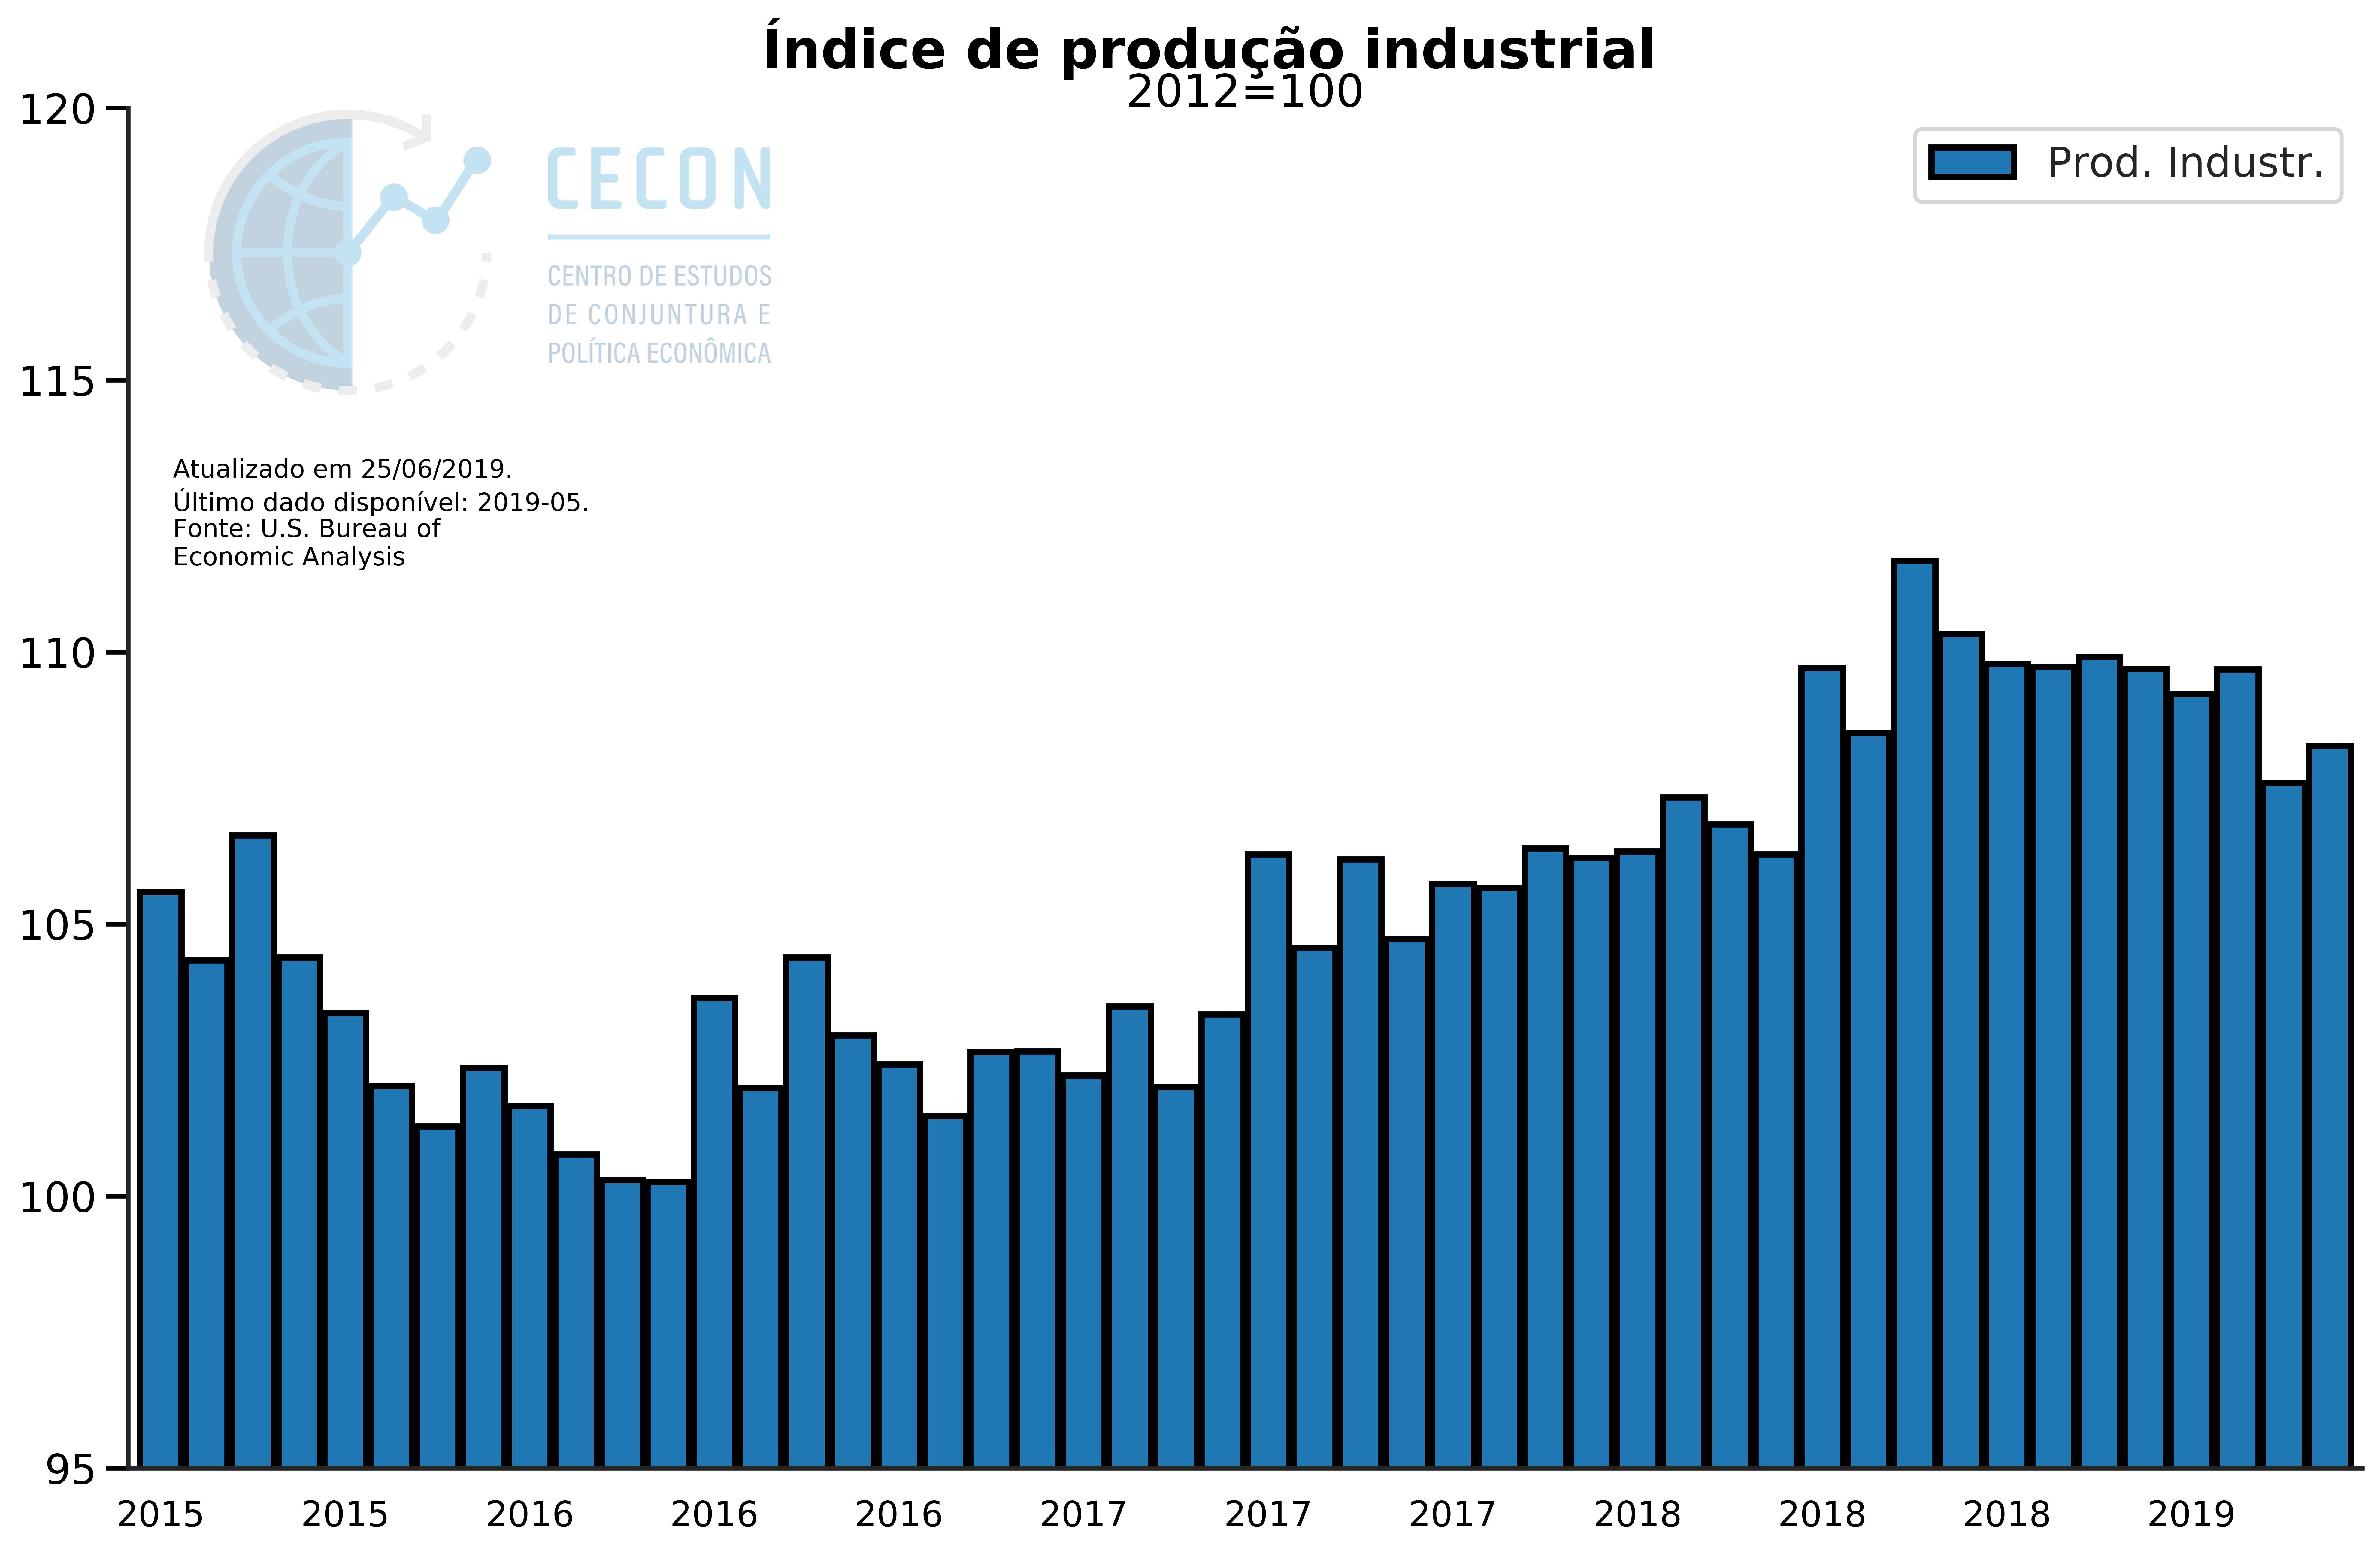

In [37]:
df = web.DataReader(
    [
        'IPB50001N'
    ],
    'fred',
    start,
    end)
df.columns = [
    "Prod. Industr.",
]
df.index.name = ''

sns.set_context('talk')
fim = 12*4
periodo = len(df["2002"])
fig, ax = plt.subplots(figsize=(20, 16))

df.tail(fim).plot(
    kind='bar',
    ax=ax,
    width=0.9,
    edgecolor='black',
    linewidth=2.5,
    figsize=(16, 10),
    zorder=1)

plt.suptitle(
    'Índice de produção industrial', 
    color='black',
    weight='bold',
    y=.93)

ax.set_title(
    '2012=100', 
    color='black',
    y=.99)

ax.text(.02,
        0.66,
        'Fonte: U.S. Bureau of \nEconomic Analysis',
        verticalalignment='bottom',
        horizontalalignment='left',
        transform=ax.transAxes,
        color='black',
        fontsize=10)
ax.text(.02,
        0.7,
        'Atualizado em {}. \nÚltimo dado disponível: {}.'.format(
            datetime.datetime.now().strftime("%d/%m/%Y"),
            df.index[-1].to_period('M')),
        verticalalignment='bottom',
        horizontalalignment='left',
        transform=ax.transAxes,
        color='black',
        fontsize=10)

ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')
ax.yaxis.label.set_color('black')
ax.xaxis.label.set_color('black')
ax.set_ylim(95,120)

labels = [i.strftime("%Y") for i in df.tail(fim).index]
dates = ["" for i in df.tail(fim).index]

for i in range(len(dates)):

    if i % 4 == 0:
        dates[i] = labels[i]

ax.tick_params(axis='x', which='minor', width=1)

ax.xaxis.set_ticklabels(dates,
                        fontsize=14,
                        minor=False,
                        rotation=0,
                        color='black')
ax.xaxis.set_ticks_position('none')

ax2 = fig.add_axes([0.15, 0.7, 0.2, 0.2], zorder=0)
ax2.imshow(logo, aspect='equal', zorder=0, alpha=.25)

ax2.axis('off')

sns.despine()
fig.savefig(
    'ProdIndust.png',
    bbox_inches='tight',
    dpi=300,
    pad_inches=0.05
)
plt.show()

# Investimento

## Decomposição do investimento

In [52]:
df = web.DataReader(
    [
        'GPDI',  # Gross Private Domestic Investment
        'Y033RC1Q027SBEA',  # Gross Private Domestic Investment: Fixed Investment: Nonresidential: Equipment
        'B009RC1Q027SBEA',  # Private fixed investment: Nonresidential: Structures
        'Y001RC1Q027SBEA',  # Gross Private Domestic Investment: Fixed Investment: Nonresidential: Intellectual Property Products
        'PRFI', # Private Residential Fixed Investment
        'CBI', # Change in Private Inventories
    ],
    'fred',
    start,
    end)
df.columns = [
    "FBCF",  
    "Máquinas e equipamentos", 
    'Construação',
    "Propriedade intelectual",
    "Residencial",
    "Variação de Estoque"
]
df.index.name = ''
df.head()

FBCF  Máquinas e equipamentos  Construação  \
                                                            
1970-01-01  168.113                   66.401       39.490   
1970-04-01  171.455                   66.748       40.313   
1970-07-01  173.904                   67.661       40.578   
1970-10-01  166.754                   64.834       40.767   
1971-01-01  189.495                   66.644       41.504   

            Propriedade intelectual  Residencial  Variação de Estoque  
                                                                       
1970-01-01                   17.905       42.493                1.823  
1970-04-01                   17.948       41.365                5.081  
1970-07-01                   18.016       42.566                5.083  
1970-10-01                   17.918       47.218               -3.984  
1971-01-01                   18.133       50.961               12.254

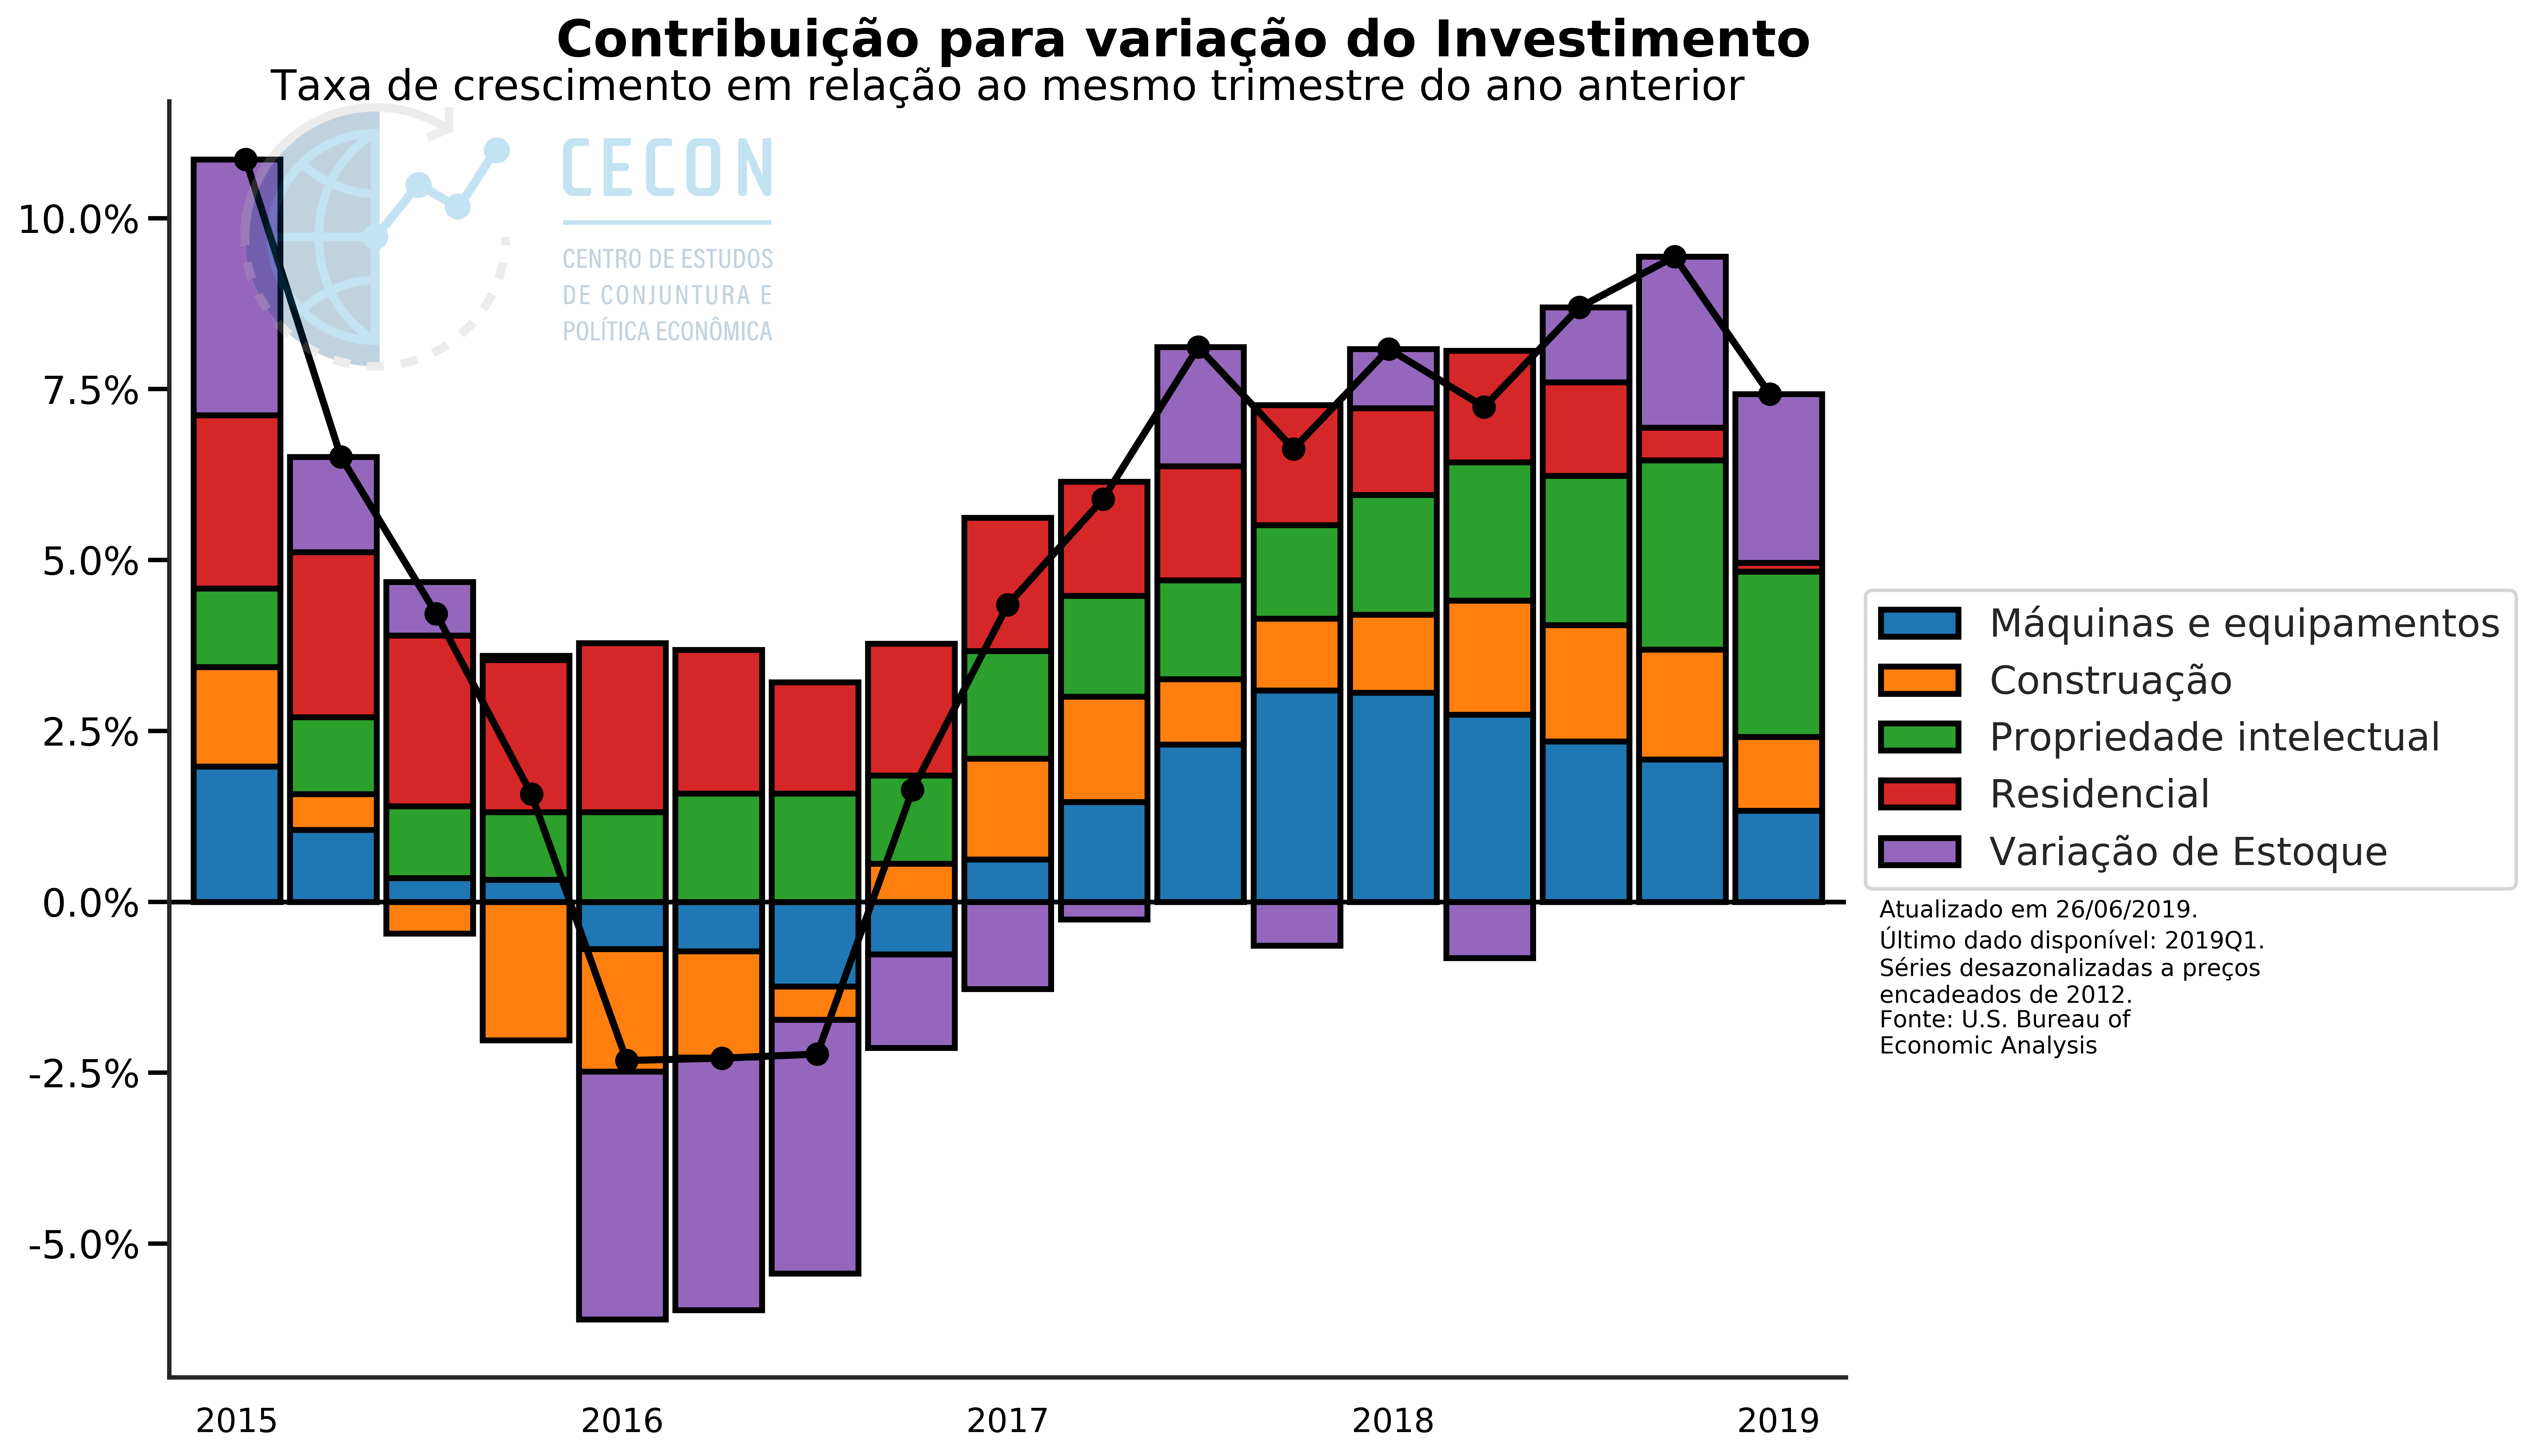

In [54]:
sns.set_context('talk')
fim = 17
periodo = len(df["FBCF"]["2002"])
fig, ax = plt.subplots(figsize=(20, 16))

contribuicao = (df.drop("FBCF", axis='columns').diff(
    periodo).apply(lambda x: x / (df["FBCF"].shift(periodo))).tail(fim))
soma = df.drop("FBCF", axis='columns').diff(periodo).apply(lambda x: x / (df[
    "FBCF"].shift(periodo))).tail(fim).sum(axis=1)

contribuicao.apply(lambda x: (x / soma) * df["FBCF"].pct_change(periodo).tail(
    fim)).plot(
        kind='bar',
        stacked=True,
        ax=ax,
        width=0.9,
        # cmap="RdYlGn",
        edgecolor='black',
        linewidth=2.5,
        figsize=(16, 10),
        zorder=1)

ax.axhline(y=0, color='black', linestyle='-', lw=2)

axl = ax.twiny()
axl.plot(ax.get_xticks(),
         df["FBCF"].pct_change(periodo).tail(fim),
         marker='o',
         ls='-',
         color='black',
         lw=3,
         label='PIB')

axl.axis('off')

# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.suptitle(
    'Contribuição para variação do Investimento',
    color='black',
    weight='bold',
    y=.93)

ax.set_title(
    'Taxa de crescimento em relação ao mesmo trimestre do ano anterior', color='black', y=.99)

ax.text(1.02,
        0.25,
        'Fonte: U.S. Bureau of \nEconomic Analysis',
        verticalalignment='bottom',
        horizontalalignment='left',
        transform=ax.transAxes,
        color='black',
        fontsize=10)
ax.text(1.02,
        0.29,
        'Atualizado em {}. \nÚltimo dado disponível: {}. \nSéries {}.'.format(
            datetime.datetime.now().strftime("%d/%m/%Y"),
            df.index[-1].to_period('Q'),
            "desazonalizadas a preços \nencadeados de 2012"),
        verticalalignment='bottom',
        horizontalalignment='left',
        transform=ax.transAxes,
        color='black',
        fontsize=10)

ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')
ax.yaxis.label.set_color('black')
ax.xaxis.label.set_color('black')
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.1%}'.format(y)))

labels = [i.strftime("%Y") for i in df.tail(fim).index]
dates = ["" for i in df.tail(fim).index]

for i in range(len(dates)):

    if i % 4 == 0:
        dates[i] = labels[i]

ax.tick_params(axis='x', which='minor', width=1)

ax.xaxis.set_ticklabels(dates,
                        fontsize=14,
                        minor=False,
                        rotation=0,
                        color='black')
ax.xaxis.set_ticks_position('none')

ax2 = fig.add_axes([0.15, 0.7, 0.2, 0.2], zorder=0)
ax2.imshow(logo, aspect='equal', zorder=0, alpha=.25)

ax2.axis('off')

sns.despine()
fig.savefig(
    'Contrib_Investo_AnoAnterior.png',
    bbox_inches='tight',
    dpi=300,
    pad_inches=0.05
)
plt.show()

## Investimento não residencial

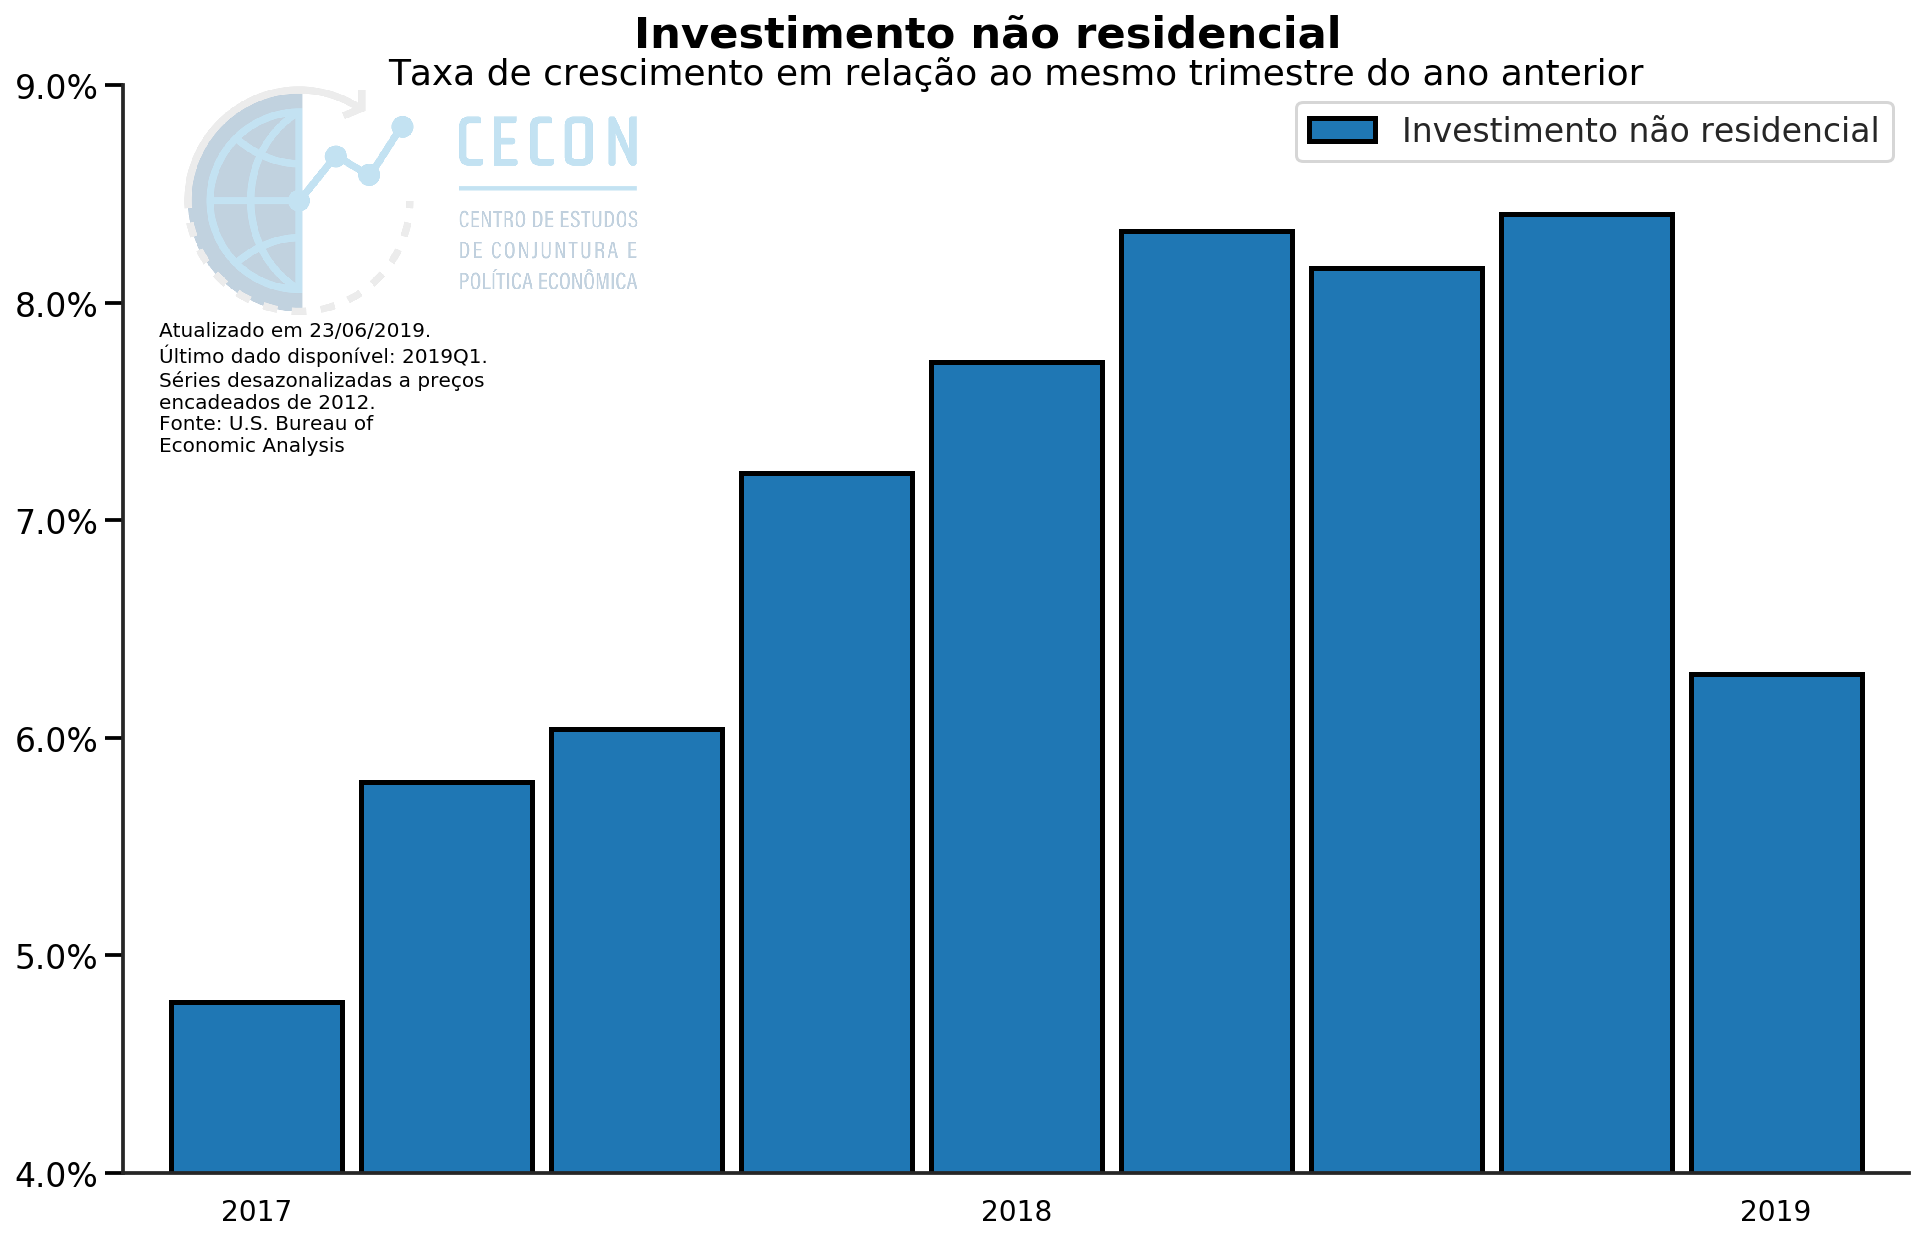

In [4]:
df = web.DataReader(
    [
        'GDPC1',
        'PNFI',
    ],
    'fred',
    start,
    end)
df.columns = [
    "PIB", "Investimento não residencial"
]
df.index.name = ''

sns.set_context('talk')
fim = 9
periodo = len(df["PIB"]["2002"])
fig, ax = plt.subplots(figsize=(20, 16))

df[["Investimento não residencial"]].pct_change(periodo).tail(fim).plot(
    kind='bar',
    ax=ax,
    width=0.9,
    edgecolor='black',
    linewidth=2.5,
    figsize=(16, 10),
    zorder=1)

plt.suptitle(
    'Investimento não residencial', 
    color='black',
    weight='bold',
    y=.93)

ax.set_title(
    'Taxa de crescimento em relação ao mesmo trimestre do ano anterior', 
    color='black',
    y=.99)

ax.text(.02,
        0.66,
        'Fonte: U.S. Bureau of \nEconomic Analysis',
        verticalalignment='bottom',
        horizontalalignment='left',
        transform=ax.transAxes,
        color='black',
        fontsize=10)
ax.text(.02,
        0.7,
        'Atualizado em {}. \nÚltimo dado disponível: {}. \nSéries {}.'.format(
            datetime.datetime.now().strftime("%d/%m/%Y"),
            df.index[-1].to_period('Q'),
            "desazonalizadas a preços \nencadeados de 2012"),
        verticalalignment='bottom',
        horizontalalignment='left',
        transform=ax.transAxes,
        color='black',
        fontsize=10)

ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')
ax.yaxis.label.set_color('black')
ax.xaxis.label.set_color('black')
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.1%}'.format(y)))
ax.set_ylim(0.04,0.09)

labels = [i.strftime("%Y") for i in df.tail(fim).index]
dates = ["" for i in df.tail(fim).index]

for i in range(len(dates)):

    if i % 4 == 0:
        dates[i] = labels[i]

ax.tick_params(axis='x', which='minor', width=1)

ax.xaxis.set_ticklabels(dates,
                        fontsize=14,
                        minor=False,
                        rotation=0,
                        color='black')
ax.xaxis.set_ticks_position('none')

ax2 = fig.add_axes([0.15, 0.7, 0.2, 0.2], zorder=0)
ax2.imshow(logo, aspect='equal', zorder=0, alpha=.25)

ax2.axis('off')

sns.despine()
fig.savefig(
    'Investo_nResidencial_Ano.png',
    bbox_inches='tight',
    dpi=300,
    pad_inches=0.05
)
plt.show()

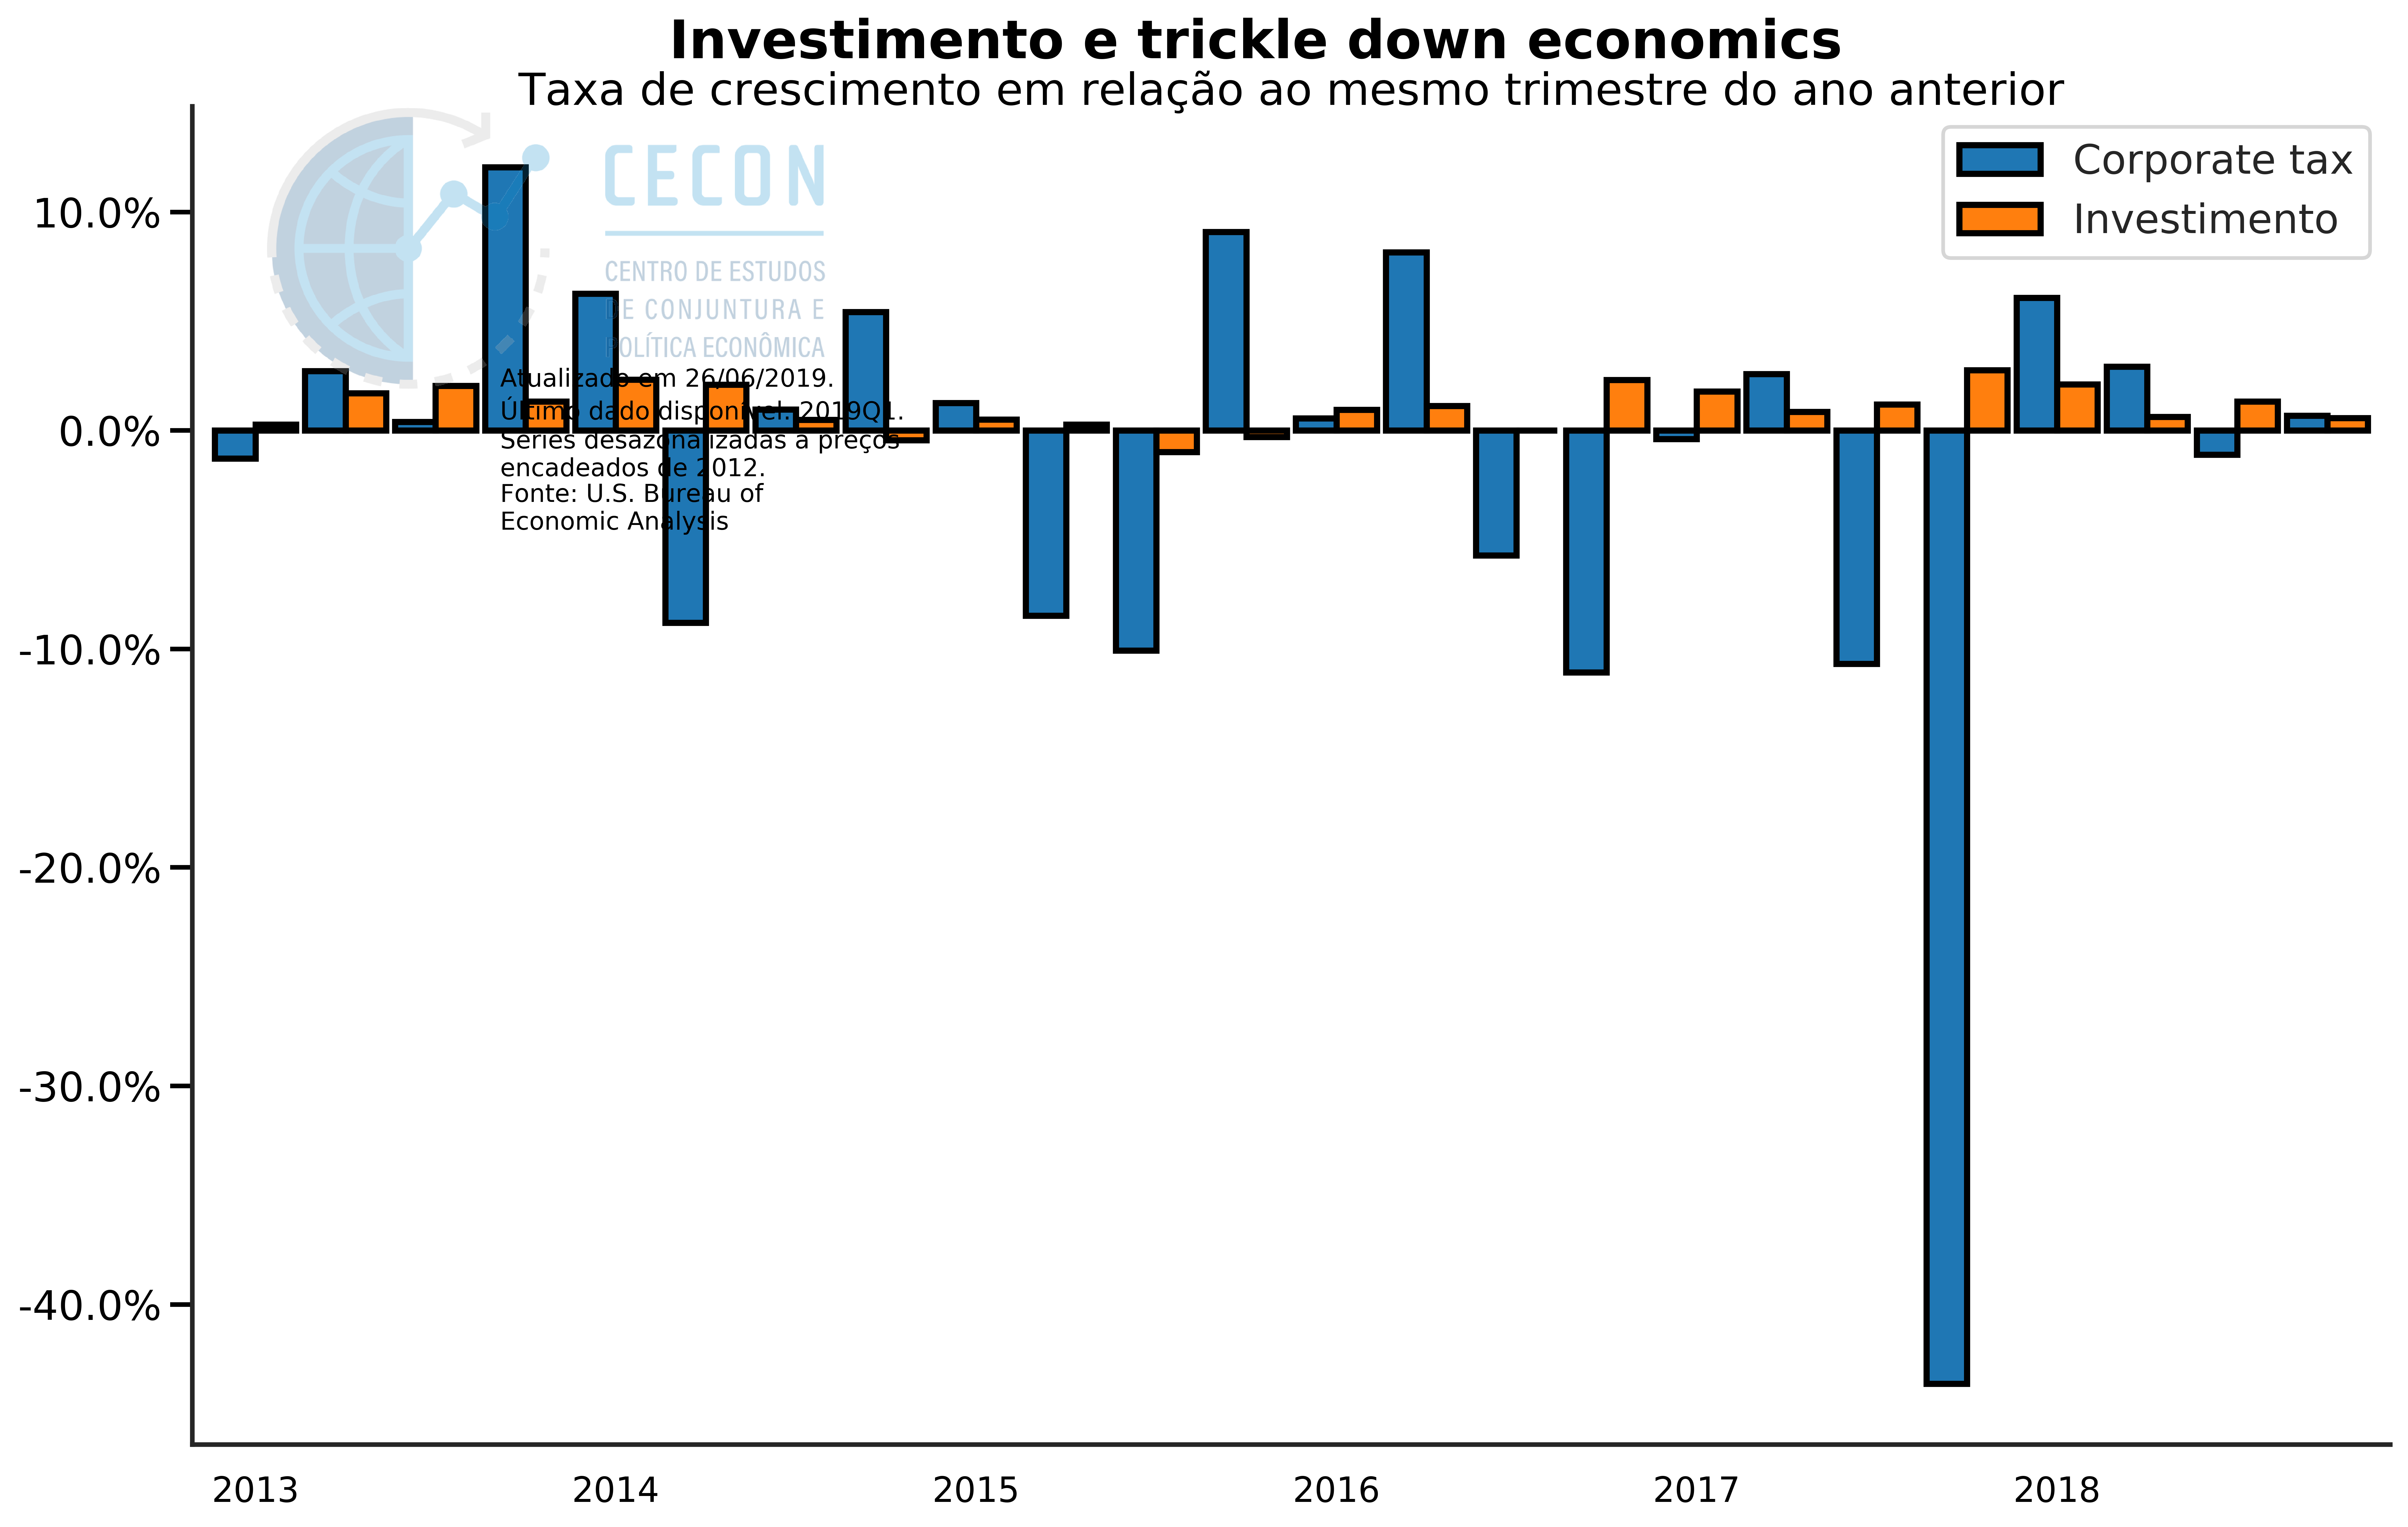

In [47]:
df = web.DataReader(
    [
        'B075RC1Q027SBEA', # Federal government current tax receipts: Taxes on corporate income
        'PNFIC1',
    ],
    'fred',
    start,
    end)
df.columns = [
    "Corporate tax", "Investimento"
]
df.index.name = ''

sns.set_context('talk')
fim = 24
periodo = 1
fig, ax = plt.subplots(figsize=(20, 16))

df.pct_change(periodo).tail(fim).plot(
    kind='bar',
    ax=ax,
    width=0.9,
    edgecolor='black',
    linewidth=2.5,
    figsize=(16, 10),
    zorder=1)

plt.suptitle(
    'Investimento e trickle down economics', 
    color='black',
    weight='bold',
    y=.93)

ax.set_title(
    'Taxa de crescimento em relação ao mesmo trimestre do ano anterior', 
    color='black',
    y=.99)

ax.text(.14,
        0.68,
        'Fonte: U.S. Bureau of \nEconomic Analysis',
        verticalalignment='bottom',
        horizontalalignment='left',
        transform=ax.transAxes,
        color='black',
        fontsize=10)
ax.text(.14,
        0.72,
        'Atualizado em {}. \nÚltimo dado disponível: {}. \nSéries {}.'.format(
            datetime.datetime.now().strftime("%d/%m/%Y"),
            df.index[-1].to_period('Q'),
            "desazonalizadas a preços \nencadeados de 2012"),
        verticalalignment='bottom',
        horizontalalignment='left',
        transform=ax.transAxes,
        color='black',
        fontsize=10)

ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')
ax.yaxis.label.set_color('black')
ax.xaxis.label.set_color('black')
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.1%}'.format(y)))
#ax.set_ylim(0.04,0.09)

labels = [i.strftime("%Y") for i in df.tail(fim).index]
dates = ["" for i in df.tail(fim).index]

for i in range(len(dates)):

    if i % 4 == 0:
        dates[i] = labels[i]

ax.tick_params(axis='x', which='minor', width=1)

ax.xaxis.set_ticklabels(dates,
                        fontsize=14,
                        minor=False,
                        rotation=0,
                        color='black')
ax.xaxis.set_ticks_position('none')

ax2 = fig.add_axes([0.15, 0.7, 0.2, 0.2], zorder=0)
ax2.imshow(logo, aspect='equal', zorder=0, alpha=.25)

ax2.axis('off')

sns.despine()
fig.savefig(
    'Investo_TrickleDown.png',
    bbox_inches='tight',
    dpi=300,
    pad_inches=0.05
)
plt.show()

## Investimento residencial

Queda de 6,9% na construção de **novos** imóveis (10% do total) para uma família em relação ao mês imeadiatamente anterior. Esse valor é antecidido por aumentos sucessivos:

- Aumento no preço dos imóveis
- Queda maior que o esperado
- Em relação ao mesmo período do ano passado, houve aumento

[Trade Economics](https://tradingeconomics.com/united-states/new-home-sales)

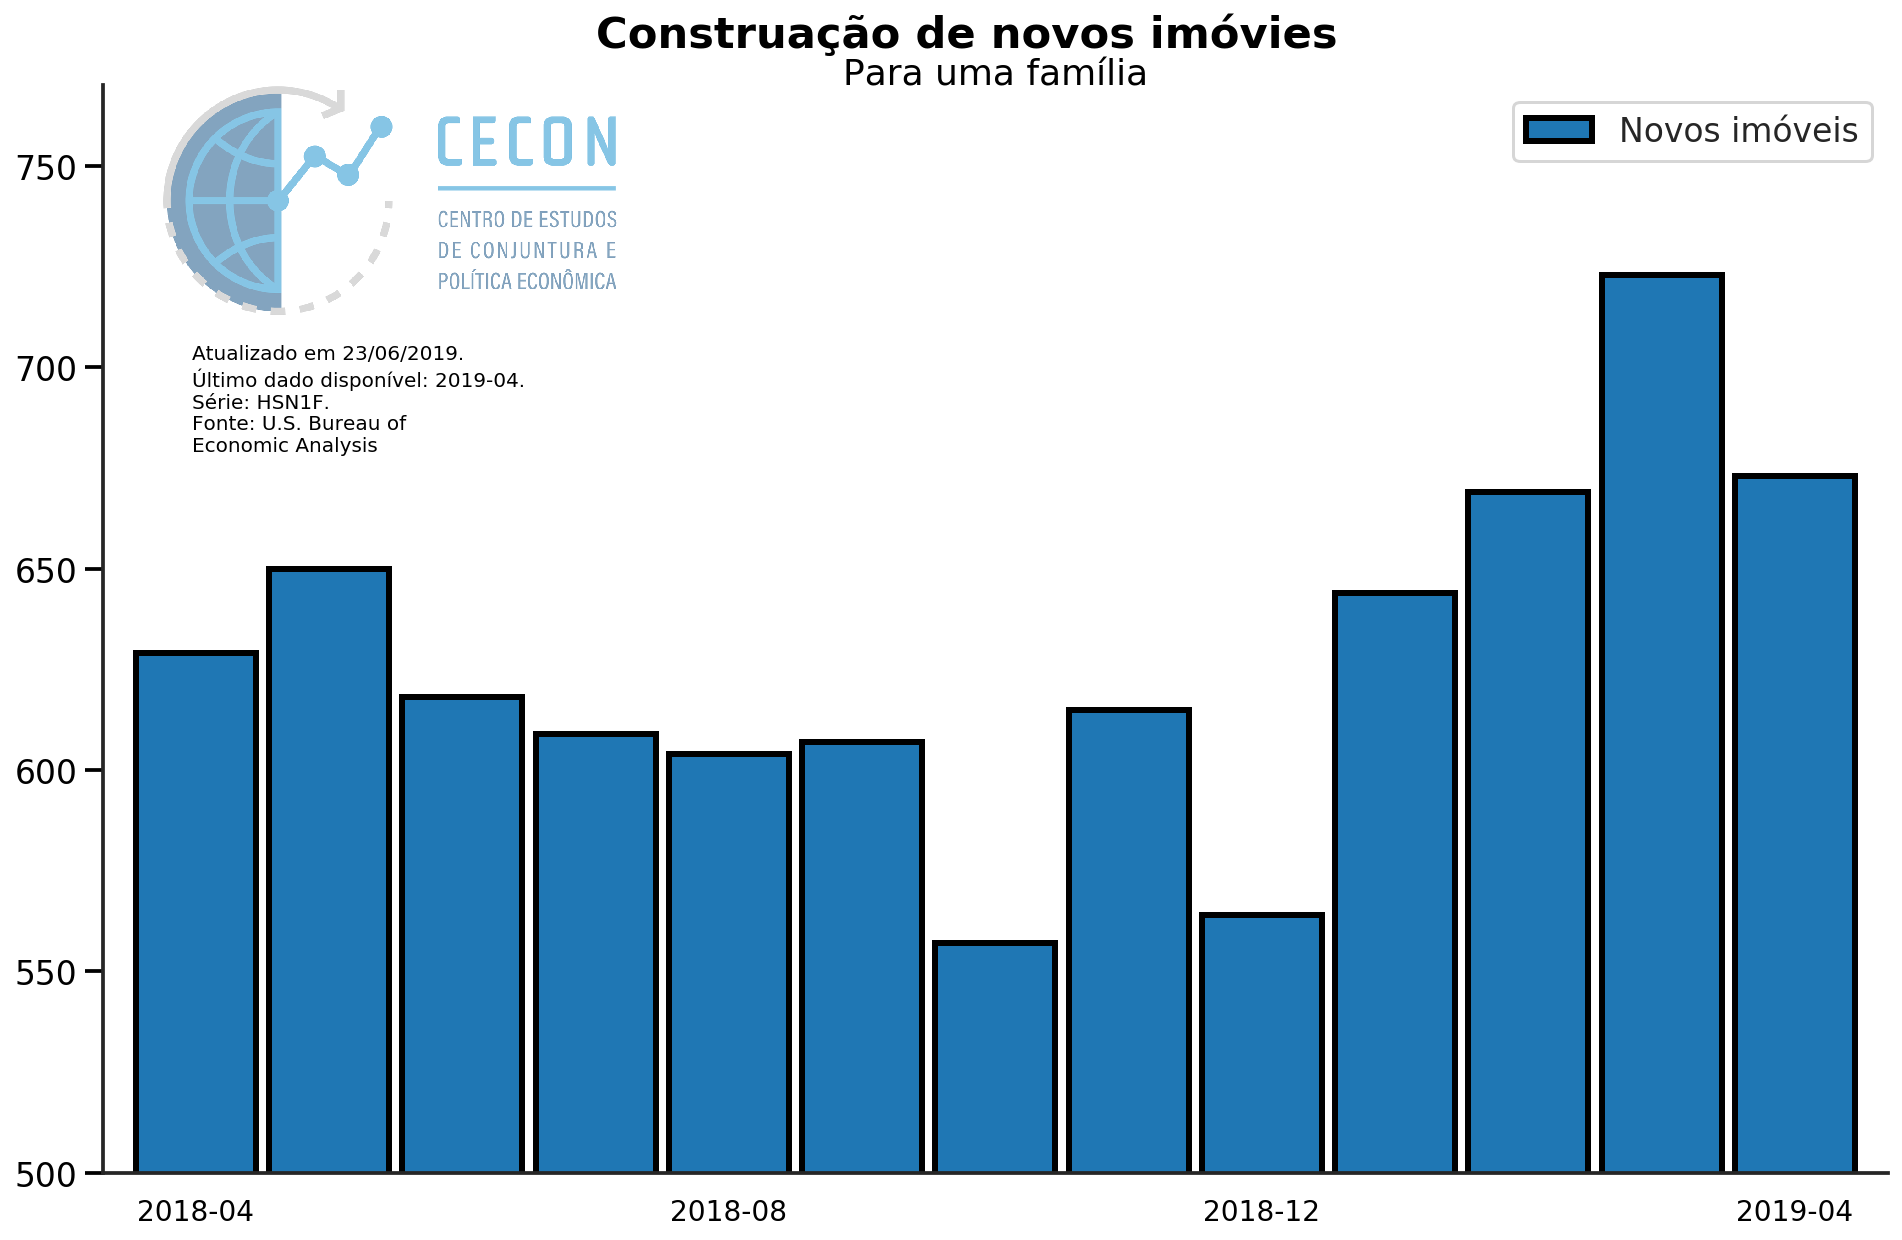

2019-01  2019-02  2019-03  2019-04
Novos imóveis    644.0    669.0    723.0    673.0

In [6]:
df = web.DataReader(
    [
        'HSN1F',  # New One Family Houses Sold: United States
    ],
    'fred',
    start, end
)
df.columns = [
    "Novos imóveis"
]
df = df.dropna()
df.index.name = ''
df.index = df.index.to_period('M')


sns.set_context('talk')
fim = 13
periodo = 1
fig, ax = plt.subplots()


df.tail(fim).plot(
    kind = 'bar', 
    ax = ax,
    width = 0.9,
    edgecolor='black',
    linewidth = 3,
    figsize=(16,10),
    zorder = 1
)


plt.suptitle(
    'Construação de novos imóvies', 
    color='black', 
    weight = 'bold',
    y = .93
)

ax.set_title(
    'Para uma família', 
    color='black', 
    y = 0.99
)

ax.text(0.05, 
        0.66, 
        'Fonte: U.S. Bureau of \nEconomic Analysis',
        verticalalignment='bottom', 
        horizontalalignment='left',
        transform=ax.transAxes,
        color='black', fontsize=10)
ax.text(
    0.05, 
    0.7,
    'Atualizado em {}. \nÚltimo dado disponível: {}. \nSérie: {}.'.format(
        datetime.datetime.now().strftime("%d/%m/%Y"),
        df.index[-1],
        "HSN1F"
    ),
    verticalalignment='bottom',
    horizontalalignment='left',
    transform=ax.transAxes,
    color='black', 
    fontsize=10
)

ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')
ax.yaxis.label.set_color('black')
ax.xaxis.label.set_color('black')

labels = [i.strftime("%Y-%m") for i in df.tail(fim).index]
dates = ["" for i in df.tail(fim).index]

for i in range(len(dates)):
  
  if i%4 == 0:
    dates[i] = labels[i]
    
ax.tick_params(axis='x', which='minor', width = 1)

ax.xaxis.set_ticklabels(
    dates, 
    fontsize = 14,
    minor = False,
    rotation = 0,
    color = 'black'
)
ax.xaxis.set_ticks_position('none') 

ax.set_ylim(500,770)

ax2 = fig.add_axes([0.15,0.7,0.2,0.2])
ax2.imshow(
    logo, 
    aspect='equal',
    zorder=0,
    alpha=.5
)

ax2.axis('off')

sns.despine()
fig.savefig(
    'InvetResid_NovosImoveis.png',
    bbox_inches='tight', 
    dpi=300 ,
    pad_inches=0.05
)
plt.show()
df.tail(4).transpose()

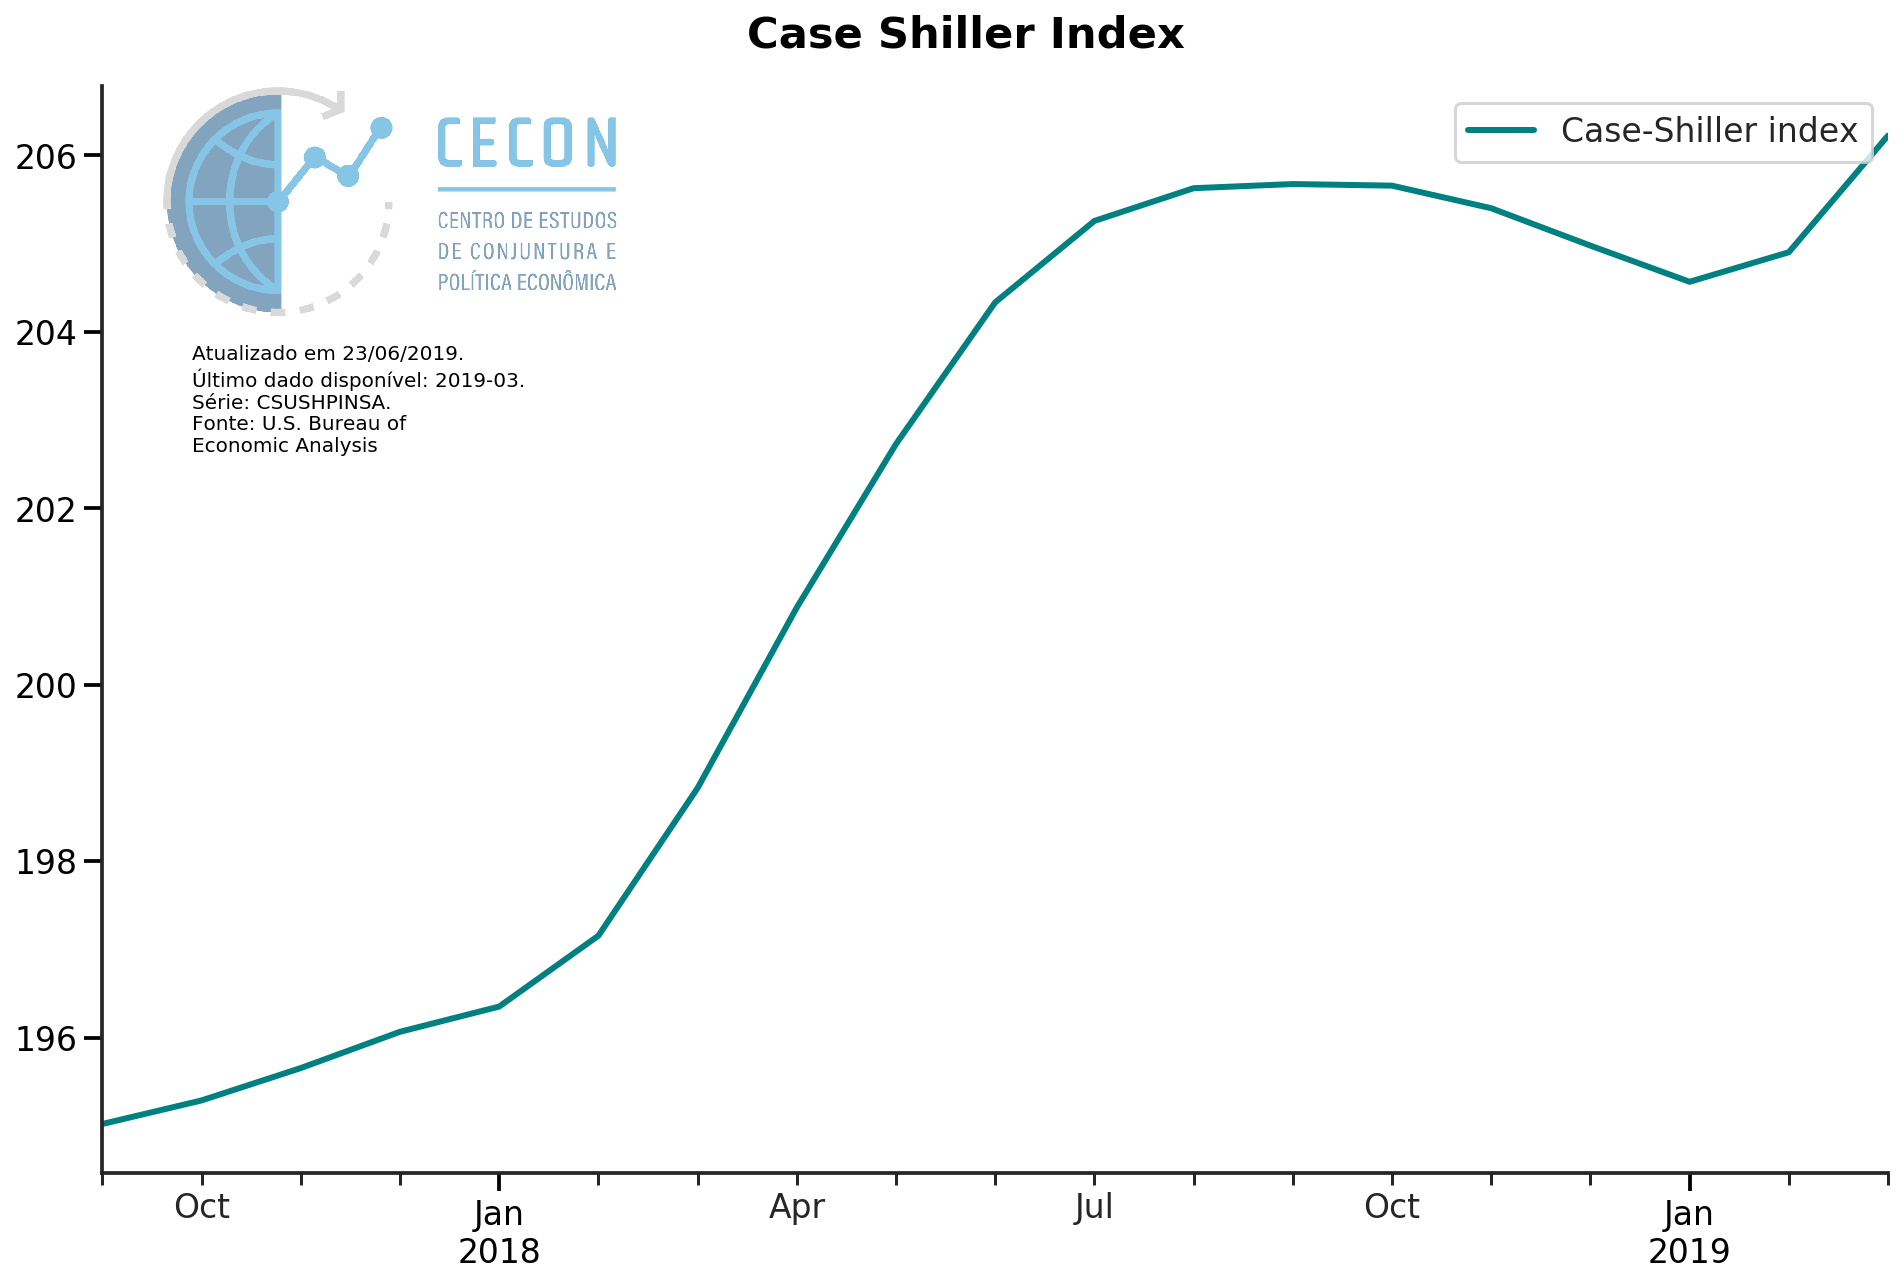

2018-04  2018-05  2018-06  2018-07  2018-08  2018-09  \
Case-Shiller index  200.876  202.729  204.335  205.258  205.629  205.676   

                    2018-10  2018-11  2018-12  2019-01  2019-02  2019-03  
Case-Shiller index  205.658  205.402  204.978  204.568  204.903  206.225

In [7]:
df = web.DataReader(
    [
        'CSUSHPINSA'
    ],
    'fred',
    start, end
)
df.columns = [
    "Case-Shiller index",
]

df = df.dropna()
df.index.name = ''
df.index = df.index.to_period('M')

sns.set_context('talk')
fim = 19
periodo = 1
fig, ax = plt.subplots()


df.tail(fim).plot(
    ax = ax,
    figsize=(16,10),
    color = 'teal',
    lw = 3,
    zorder = 1
)


plt.suptitle(
    'Case Shiller Index', 
    color='black', 
    weight = 'bold',
    y = .93
)

ax.legend(loc = 'upper right')

ax.text(0.05, 
        0.66, 
        'Fonte: U.S. Bureau of \nEconomic Analysis',
        verticalalignment='bottom', 
        horizontalalignment='left',
        transform=ax.transAxes,
        color='black', fontsize=10)
ax.text(
    0.05, 
    0.7,
    'Atualizado em {}. \nÚltimo dado disponível: {}. \nSérie: {}.'.format(
        datetime.datetime.now().strftime("%d/%m/%Y"),
        df.index[-1],
        "CSUSHPINSA"
    ),
    verticalalignment='bottom',
    horizontalalignment='left',
    transform=ax.transAxes,
    color='black', 
    fontsize=10
)

ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')
ax.yaxis.label.set_color('black')
ax.xaxis.label.set_color('black')

ax2 = fig.add_axes([0.15,0.7,0.2,0.2])
ax2.imshow(
    logo, 
    aspect='equal',
    zorder=0,
    alpha=.5
)

ax2.axis('off')

sns.despine()
fig.savefig(
    'CaseShillerIndex.png',
    bbox_inches='tight',
    dpi = 300,
    pad_inches=0.05
)
plt.show()
df.tail(12).transpose()

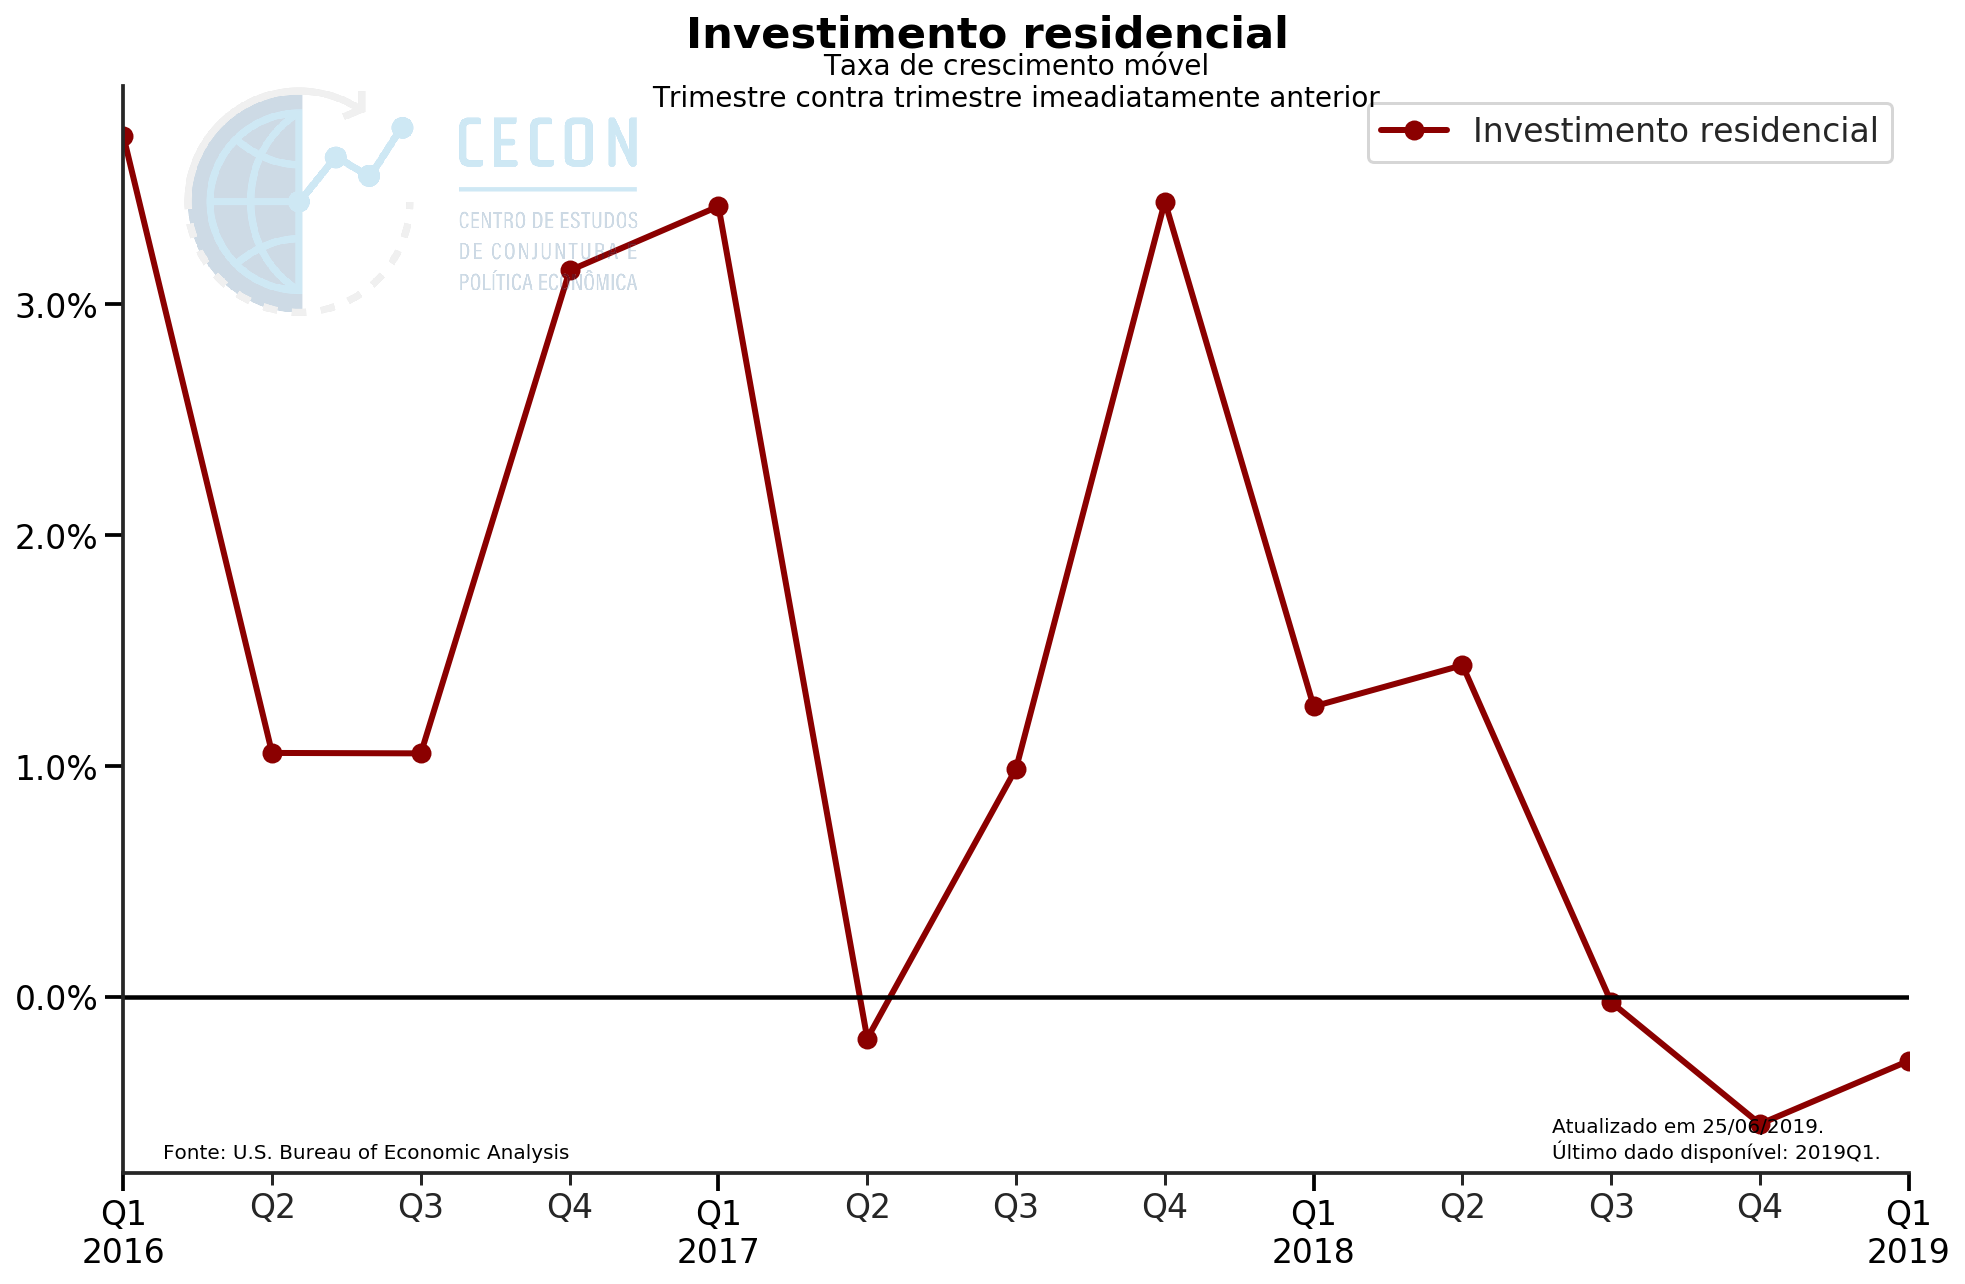

In [26]:
df = web.DataReader(
    [
        'GDPC1',  # GDP
        'PRFI',
        'CSUSHPINSA'
    ],
    'fred',
    start, end
)
df.columns = [
    "PIB",
    "Investimento residencial",
    "Case-Shiller index",
]
df = df.resample('QS').mean()
df = df.dropna()
df.index.name = ''
df['Taxa Residencial'] = df['PIB']/df['Investimento residencial']/100

sns.set_context('talk')
fim = 13
#periodo = len(df["2018"])
periodo = 1
fig, ax = plt.subplots()

df[[
    "Investimento residencial",
]].pct_change(periodo).rolling(periodo, center=False).mean().tail(fim).plot(
    ax=ax,
    lw=3,
    marker='o',
    color='darkred',
    figsize=(16, 10),
    zorder=1
)

ax.axhline(y=0, color='black')
ax.legend(loc='best').set_zorder(0)

plt.suptitle(
    'Investimento residencial',
    color='black',
    weight='bold',
    y=.93
)

ax.set_title(
    'Taxa de crescimento móvel\nTrimestre contra trimestre imeadiatamente anterior',
    color='black', fontsize=14,
    y=.97
)

ax.text(0.25,
        0.01,
        'Fonte: U.S. Bureau of Economic Analysis',
        verticalalignment='bottom',
        horizontalalignment='right',
        transform=ax.transAxes,
        color='black', fontsize=10)
ax.text(
    0.8,
    0.01,
    'Atualizado em {}. \nÚltimo dado disponível: {}.'.format(
        datetime.datetime.now().strftime("%d/%m/%Y"),
        df.index[-1].to_period('Q')
    ),
    verticalalignment='bottom',
    horizontalalignment='left',
    transform=ax.transAxes,
    color='black',
    fontsize=10
)

ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')
ax.yaxis.label.set_color('black')
ax.xaxis.label.set_color('black')
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.1%}'.format(y)))

ax2 = fig.add_axes([0.15, 0.7, 0.2, 0.2])
ax2.imshow(
    logo,
    aspect='equal',
    zorder=0,
    alpha=.2
)

ax2.axis('off')

sns.despine()
fig.savefig(
    'InvestoResidencial.png',
    bbox_inches='tight',
    dpi=300,
    pad_inches=0.05
)
plt.show()

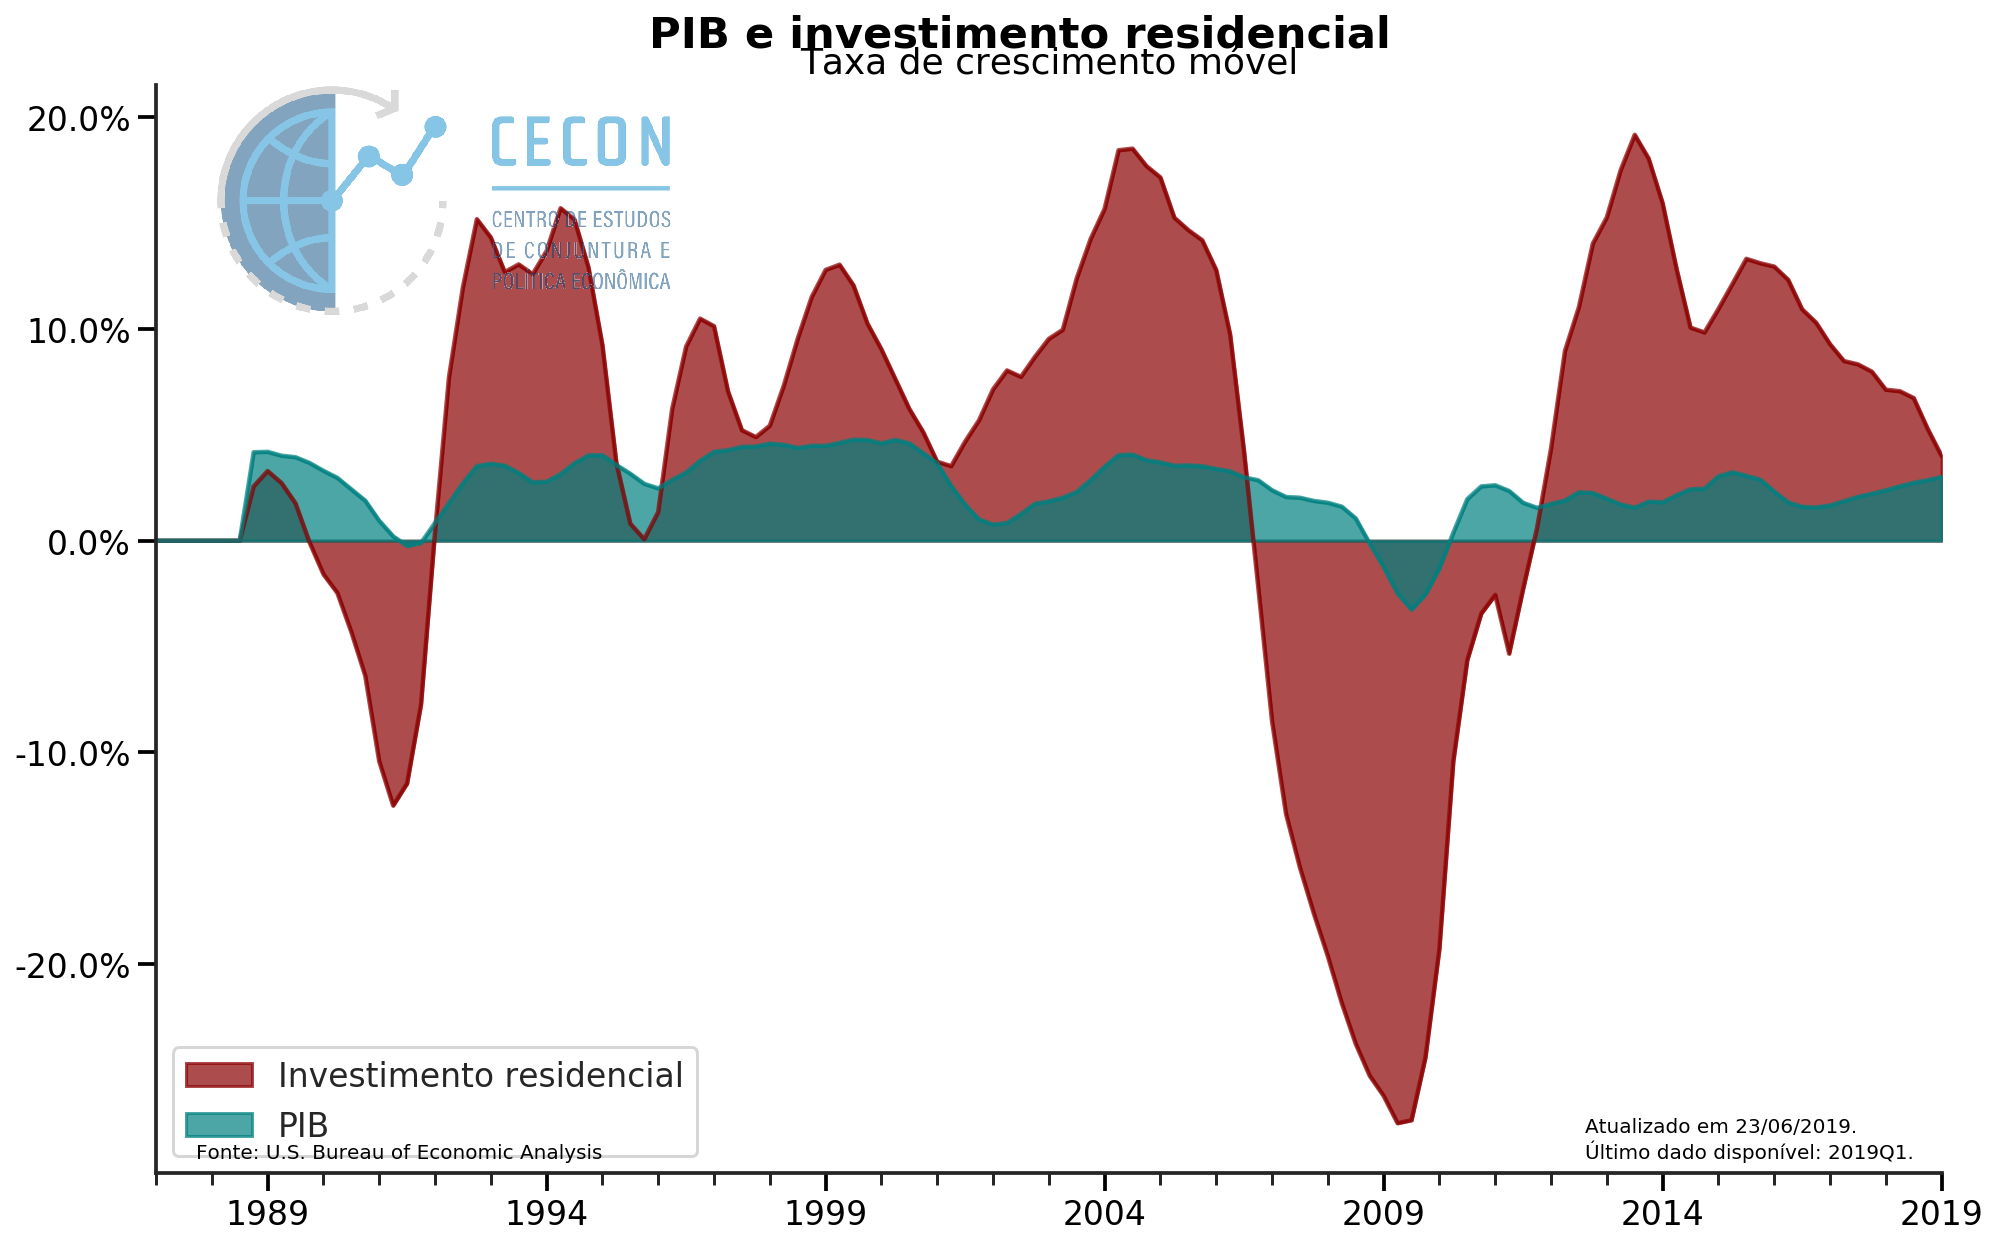

In [9]:
fim = 160
periodo = len(df["2018"])
fig, ax = plt.subplots()

df[[
    "Investimento residencial",
    "PIB"
]].rolling(periodo).mean().pct_change(periodo).tail(fim).plot(
    ax = ax,
    kind = 'area', 
    color = ('darkred', 'teal'),
    stacked = False,
    alpha = 0.7,
    figsize=(16,10),
    zorder = 1
)

ax.legend(loc = 'best').set_zorder(0)

plt.suptitle(
    'PIB e investimento residencial', 
    color='black', 
    weight = 'bold',
    y = .93
)

ax.set_title(
    'Taxa de crescimento móvel', 
    color='black', 
    y = 1
)

ax.text(0.25, 
        0.01, 
        'Fonte: U.S. Bureau of Economic Analysis',
        verticalalignment='bottom', 
        horizontalalignment='right',
        transform=ax.transAxes,
        color='black', fontsize=10)
ax.text(
    0.8, 
    0.01,
    'Atualizado em {}. \nÚltimo dado disponível: {}.'.format(
        datetime.datetime.now().strftime("%d/%m/%Y"),
        df.index[-1].to_period('Q')
    ),
    verticalalignment='bottom',
    horizontalalignment='left',
    transform=ax.transAxes,
    color='black', 
    fontsize=10
)

ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')
ax.yaxis.label.set_color('black')
ax.xaxis.label.set_color('black')
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.1%}'.format(y))) 

ax2 = fig.add_axes([0.15,0.7,0.2,0.2])
ax2.imshow(
    logo, 
    aspect='equal',
    zorder=0,
    alpha=.5
)

ax2.axis('off')

sns.despine()
fig.savefig(
    'PIB_InvestoResidencial.png',
    bbox_inches='tight', 
    dpi = 300,
    pad_inches=0.05
)
plt.show()

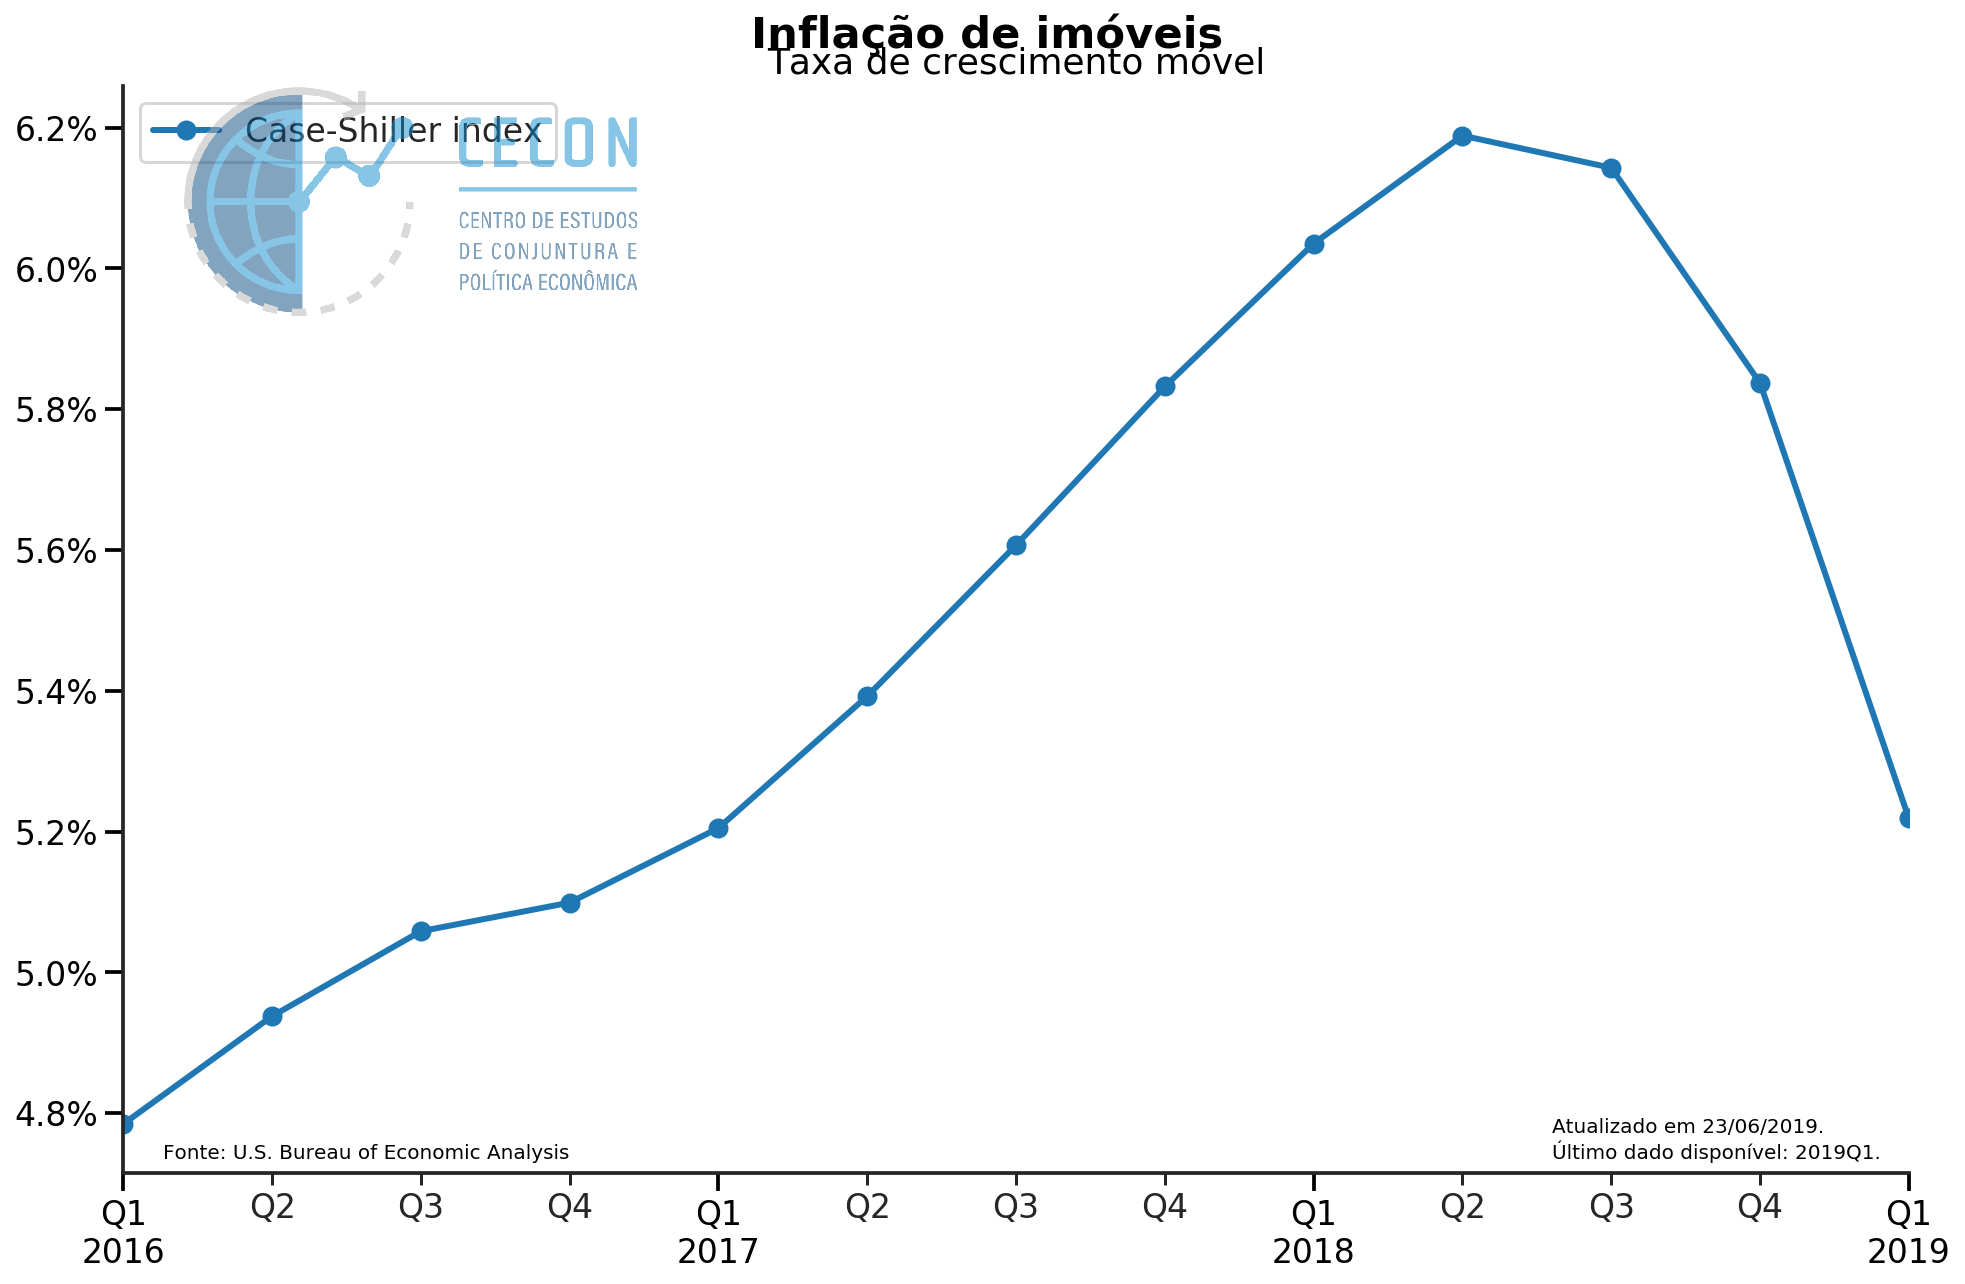

In [10]:
fim = 13
periodo = len(df["2018"])
fig, ax = plt.subplots()

df[[
    "Case-Shiller index"
]].rolling(periodo).mean().pct_change(periodo).tail(fim).plot(
    ax = ax,
    lw = 3,
    marker = 'o',
    figsize=(16,10),
    zorder = 1
)

ax.legend(loc = 'best').set_zorder(0)

plt.suptitle(
    'Inflação de imóveis', 
    color='black', 
    weight = 'bold',
    y = .93
)

ax.set_title(
    'Taxa de crescimento móvel', 
    color='black', 
    y = 1
)

ax.text(0.25, 
        0.01, 
        'Fonte: U.S. Bureau of Economic Analysis',
        verticalalignment='bottom', 
        horizontalalignment='right',
        transform=ax.transAxes,
        color='black', fontsize=10)
ax.text(
    0.8, 
    0.01,
    'Atualizado em {}. \nÚltimo dado disponível: {}.'.format(
        datetime.datetime.now().strftime("%d/%m/%Y"),
        df.index[-1].to_period('Q')
    ),
    verticalalignment='bottom',
    horizontalalignment='left',
    transform=ax.transAxes,
    color='black', 
    fontsize=10
)

ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')
ax.yaxis.label.set_color('black')
ax.xaxis.label.set_color('black')
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.1%}'.format(y))) 

ax2 = fig.add_axes([0.15,0.7,0.2,0.2])
ax2.imshow(
    logo, 
    aspect='equal',
    zorder=0,
    alpha=.5
)

ax2.axis('off')

sns.despine()
fig.savefig(
    'Infla_Imoveis.png',
    bbox_inches='tight', 
    dpi = 300,
    pad_inches=0.05
)
plt.show()

# Consumo

## Gastos

In [11]:
df = web.DataReader(
    [
        'PCE', # Personal Consumption Expenditures
    ],
    'fred',
    start, end
)
df.columns = [
    "Consumo"
]
df.index.name = ''
df.tail()

Consumo
                   
2018-12-01  14157.4
2019-01-01  14197.3
2019-02-01  14195.2
2019-03-01  14352.5
2019-04-01  14393.4

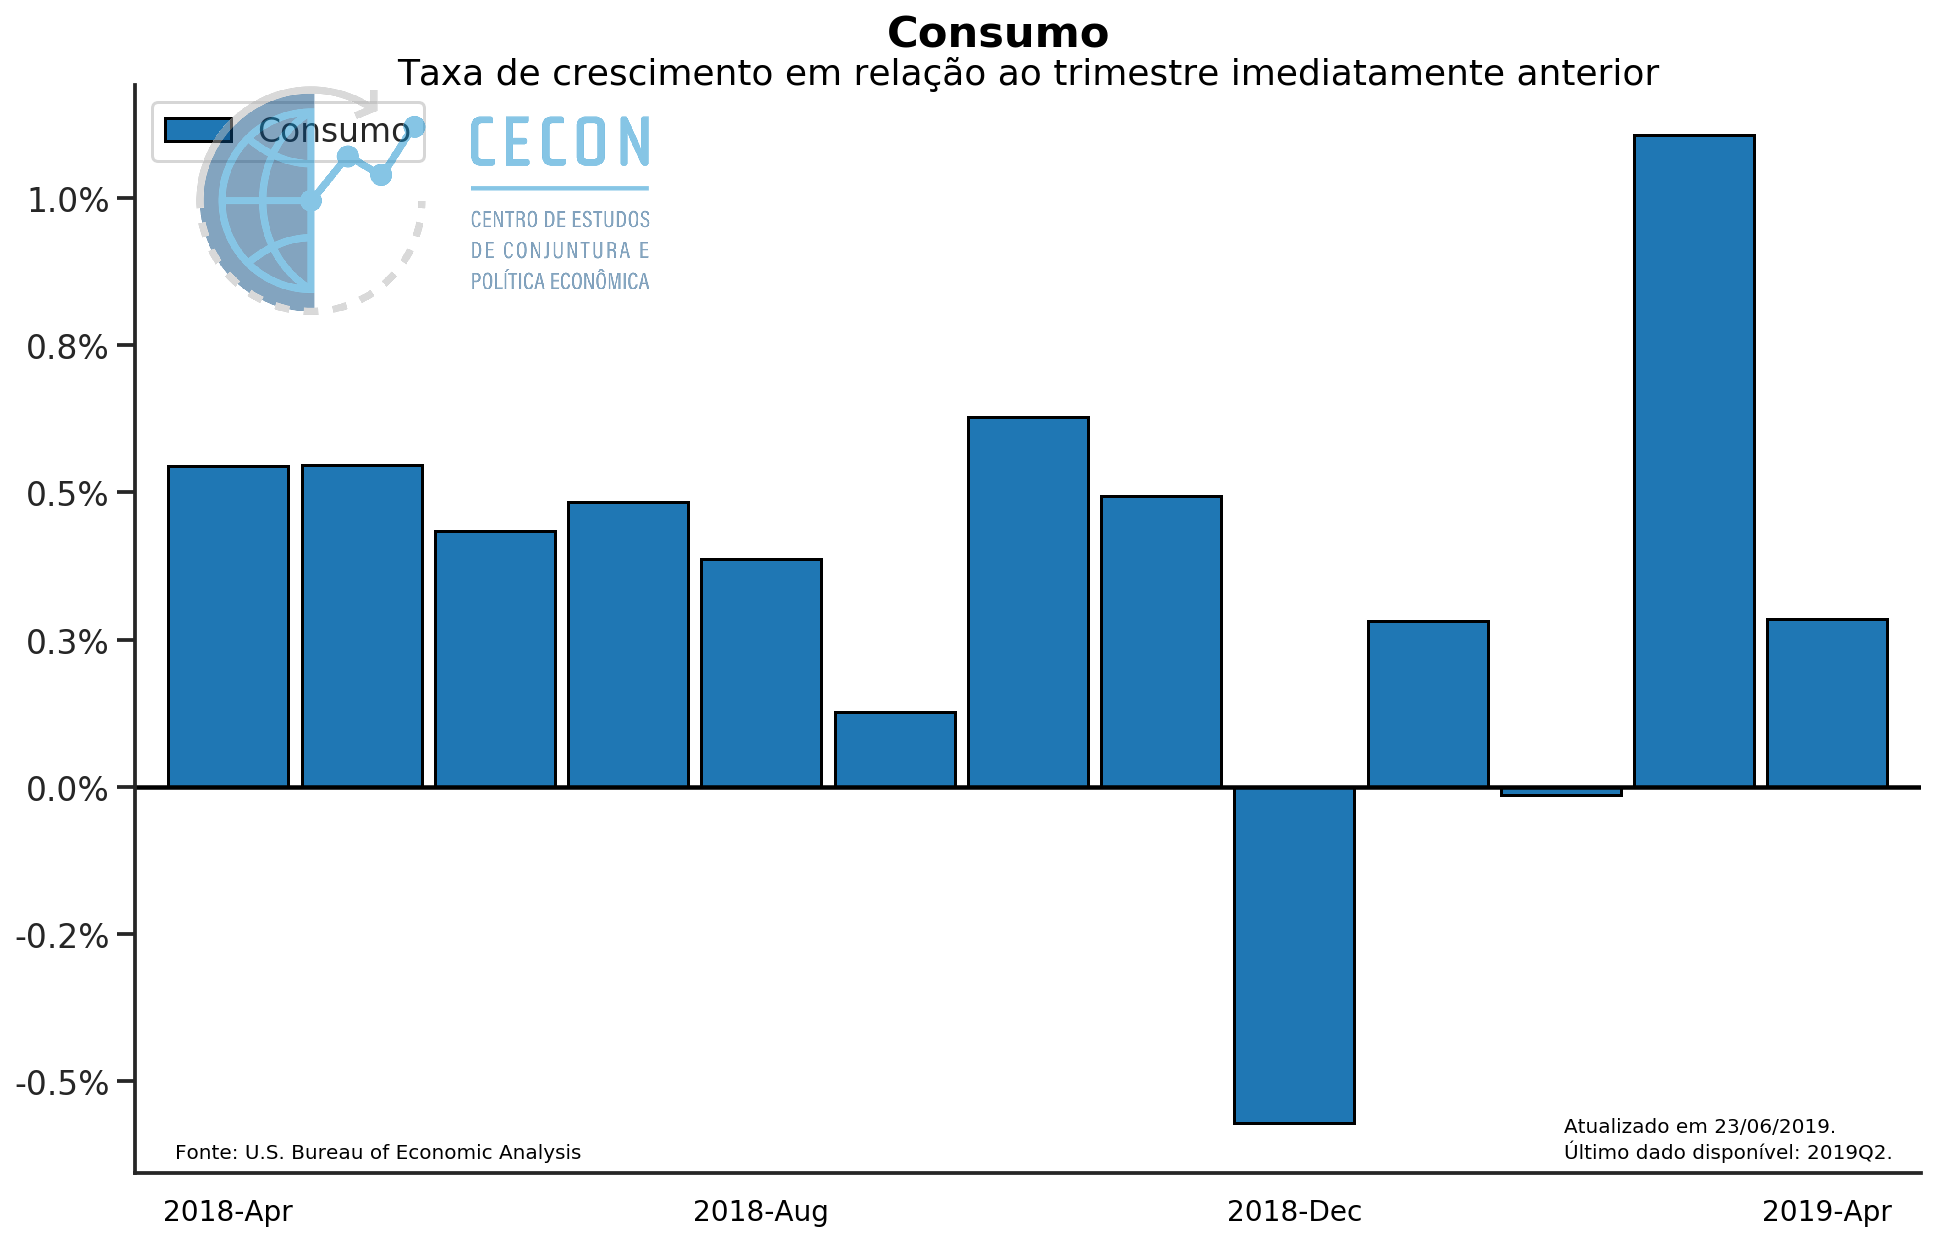

In [12]:
fim = 13
periodo = 1
fig, ax = plt.subplots()

df.rolling(periodo).mean().pct_change().tail(fim).plot(
    kind = 'bar', 
    ax = ax,
    width = 0.9,
    edgecolor='black',
    figsize=(16,10),
    zorder = 1
)

ax.legend(loc = 'best').set_zorder(0)

plt.suptitle(
    'Consumo', 
    color='black', 
    weight = 'bold',
    y = .93
)

ax.set_title(
    'Taxa de crescimento em relação ao trimestre imediatamente anterior', 
    color='black', 
    y = .99
)

ax.text(0.25, 
        0.01, 
        'Fonte: U.S. Bureau of Economic Analysis',
        verticalalignment='bottom', 
        horizontalalignment='right',
        transform=ax.transAxes,
        color='black', fontsize=10)
ax.text(
    0.8, 
    0.01,
    'Atualizado em {}. \nÚltimo dado disponível: {}.'.format(
        datetime.datetime.now().strftime("%d/%m/%Y"),
        df.index[-1].to_period('Q')
    ),
    verticalalignment='bottom',
    horizontalalignment='left',
    transform=ax.transAxes,
    color='black', 
    fontsize=10
)

labels = [i.strftime("%Y-%b") for i in df.tail(fim).index]
dates = ["" for i in df.tail(fim).index]

for i in range(len(dates)):
  
  if i%4 == 0:
    dates[i] = labels[i]

ax.tick_params(axis='x', which='minor', width = 1)
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.1%}'.format(y))) 
ax.axhline(y=0,color = 'black')

ax.xaxis.set_ticklabels(
    dates, 
    fontsize = 14,
    minor = False,
    rotation = 0,
    color = 'black'
)
ax.xaxis.set_ticks_position('none') 


ax2 = fig.add_axes([0.15,0.7,0.2,0.2])
ax2.imshow(
    logo, 
    aspect='equal',
    zorder=0,
    alpha=.5
)

ax2.axis('off')

sns.despine()
fig.savefig(
    'Consumo_Gastos.png',
    bbox_inches='tight', 
    dpi = 300,
    pad_inches=0.05
)
plt.show()

## Bens de consumo duráveis

Queda do consumo de bens duráveis maior que a esperada pelo mercado:

- Destaque para equipamentos de transportes
  - Excluindo transportes, os bens duráveis se mostraram basicamente inalterados
- Aumento nos estoques
- Queda em encomendas de bens de capital não militares

In [13]:
df = web.DataReader(
    [
        'PCDG' # Personal Consumption Expenditures: Durable Goods - Billions of Dollars, Seasonally Adjusted Annual Rate
    ],
    'fred',
    start, end
)
df.columns = [
    "Bens de consumo duráveis",
]
df.index.name = ''
df.tail()

Bens de consumo duráveis
                                    
2018-01-01                  1434.474
2018-04-01                  1458.706
2018-07-01                  1468.512
2018-10-01                  1476.021
2019-01-01                  1456.688

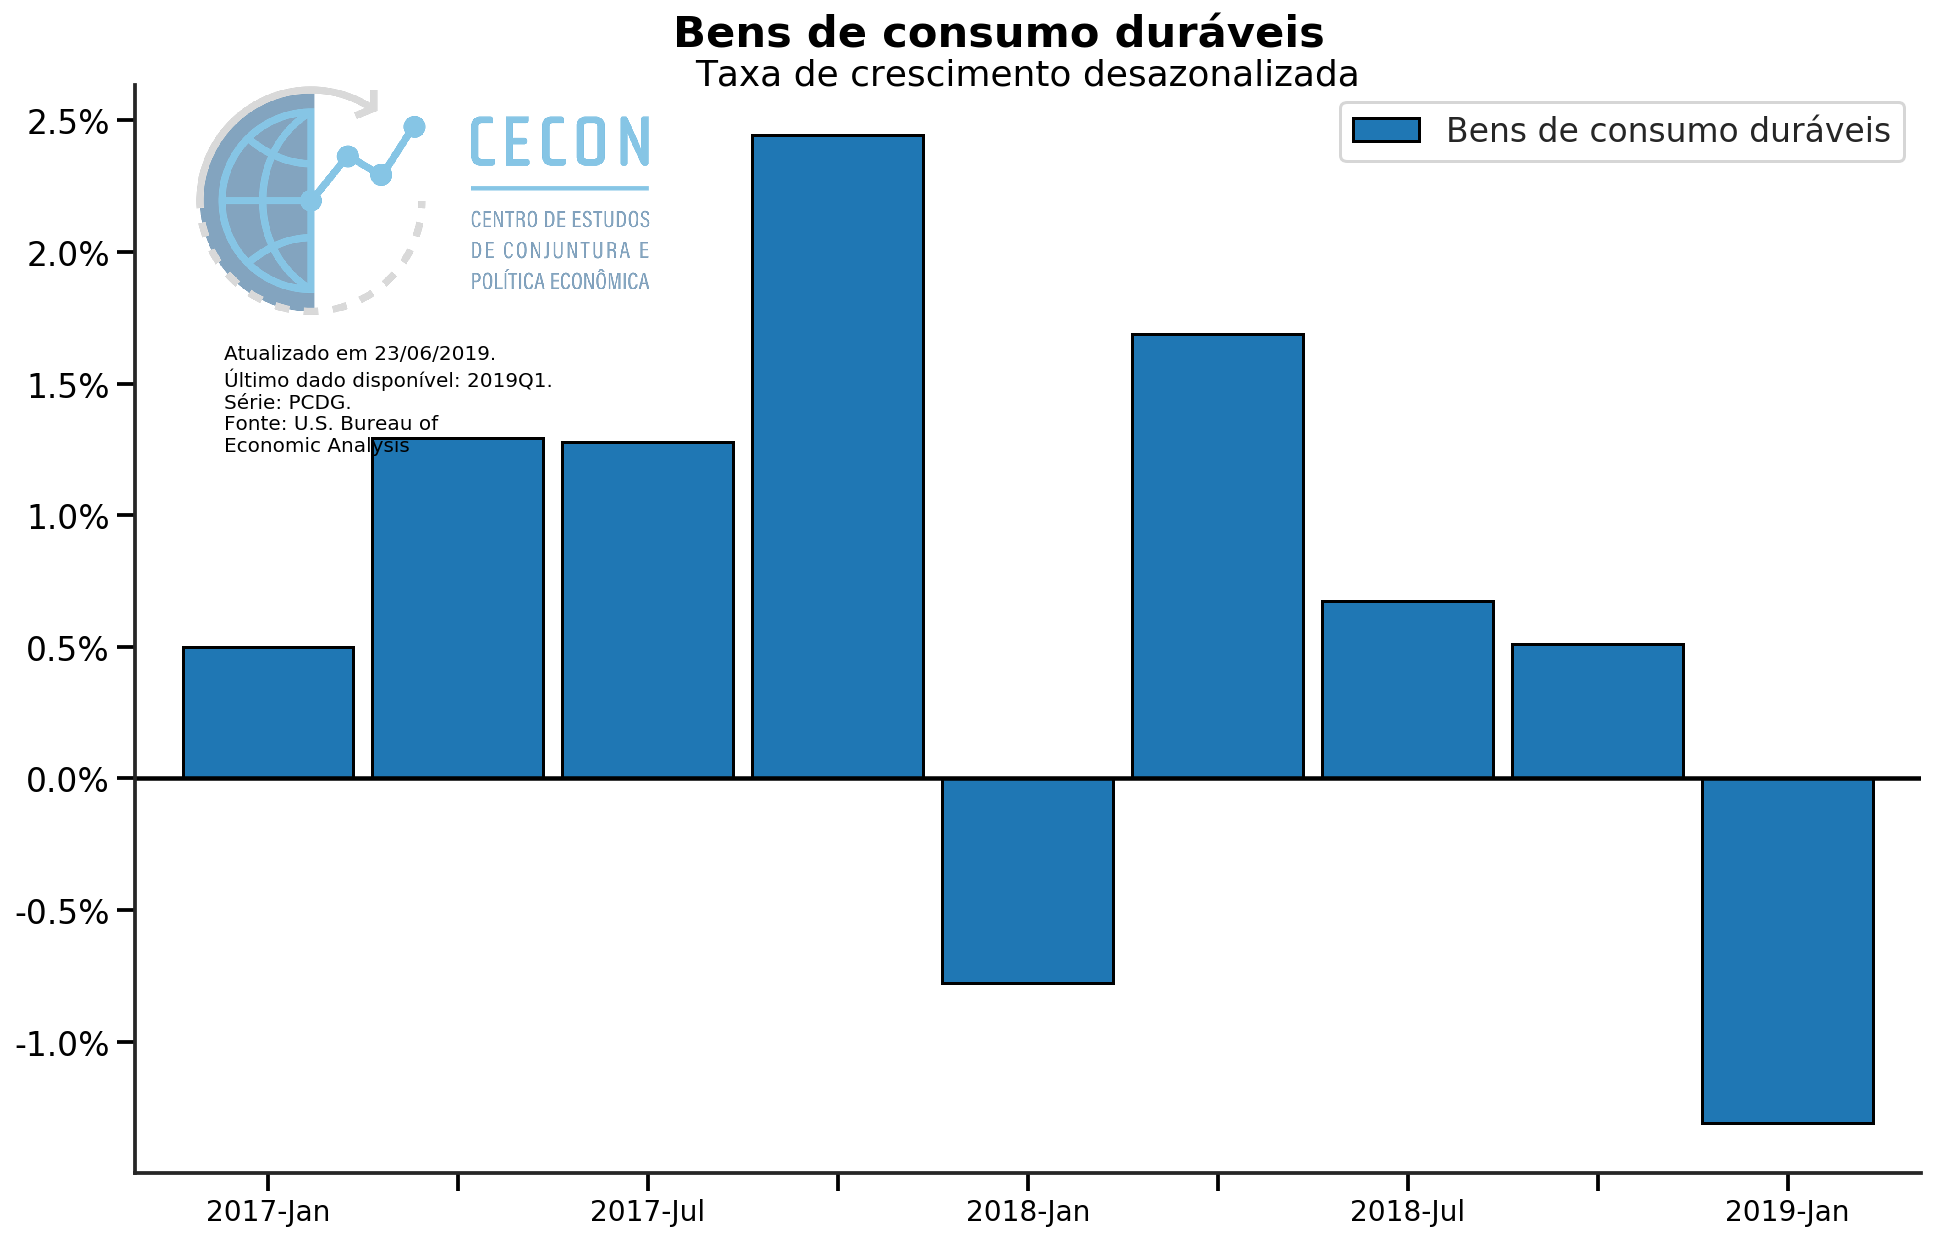

In [14]:
sns.set_context('talk')
fim = 9
periodo = 1
fig, ax = plt.subplots()


df.rolling(periodo).mean().pct_change().tail(fim).plot(
    kind = 'bar', 
    ax = ax,
    width = 0.9,
    edgecolor='black',
    figsize=(16,10),
    zorder = 1
)


plt.suptitle(
    'Bens de consumo duráveis', 
    color='black', 
    weight = 'bold',
    y = .93
)

ax.set_title(
    'Taxa de crescimento desazonalizada', 
    color='black', 
    y = 0.99
)

ax.text(0.05, 
        0.66, 
        'Fonte: U.S. Bureau of \nEconomic Analysis',
        verticalalignment='bottom', 
        horizontalalignment='left',
        transform=ax.transAxes,
        color='black', fontsize=10)
ax.text(
    0.05, 
    0.7,
    'Atualizado em {}. \nÚltimo dado disponível: {}. \nSérie: {}.'.format(
        datetime.datetime.now().strftime("%d/%m/%Y"),
        df.index[-1].to_period('Q'),
        "PCDG"
    ),
    verticalalignment='bottom',
    horizontalalignment='left',
    transform=ax.transAxes,
    color='black', 
    fontsize=10
)

ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')
ax.yaxis.label.set_color('black')
ax.xaxis.label.set_color('black')

labels = [i.strftime("%Y-%b") for i in df.tail(fim).index]
dates = ["" for i in df.tail(fim).index]

for i in range(len(dates)):
  
  if i%2 == 0:
    dates[i] = labels[i]
    
ax.tick_params(axis='x', which='minor', width = 1)
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.1%}'.format(y))) 
ax.axhline(y=0,color = 'black')

ax.xaxis.set_ticklabels(
    dates, 
    fontsize = 14,
    minor = False,
    rotation = 0,
    color = 'black'
)

ax2 = fig.add_axes([0.15,0.7,0.2,0.2])
ax2.imshow(
    logo, 
    aspect='equal',
    zorder=0,
    alpha=.5
)

ax2.axis('off')

sns.despine()
fig.savefig(
    'Consumo_Duraveis.png',
    bbox_inches='tight', 
    dpi = 300,
    pad_inches=0.05
)
plt.show()

## Confiança do consumidor

Queda sensivelmente inferior em relação à expectativa de mercado.

In [15]:
df = web.DataReader(
    [
        'UMCSENT' # University of Michigan: Consumer Sentiment
    ],
    'fred',
    start, end
)
df.columns = [
    "Confiança do consumidor",
]
df.index.name = ''
df.tail()

Confiança do consumidor
                                   
2018-12-01                     98.3
2019-01-01                     91.2
2019-02-01                     93.8
2019-03-01                     98.4
2019-04-01                     97.2

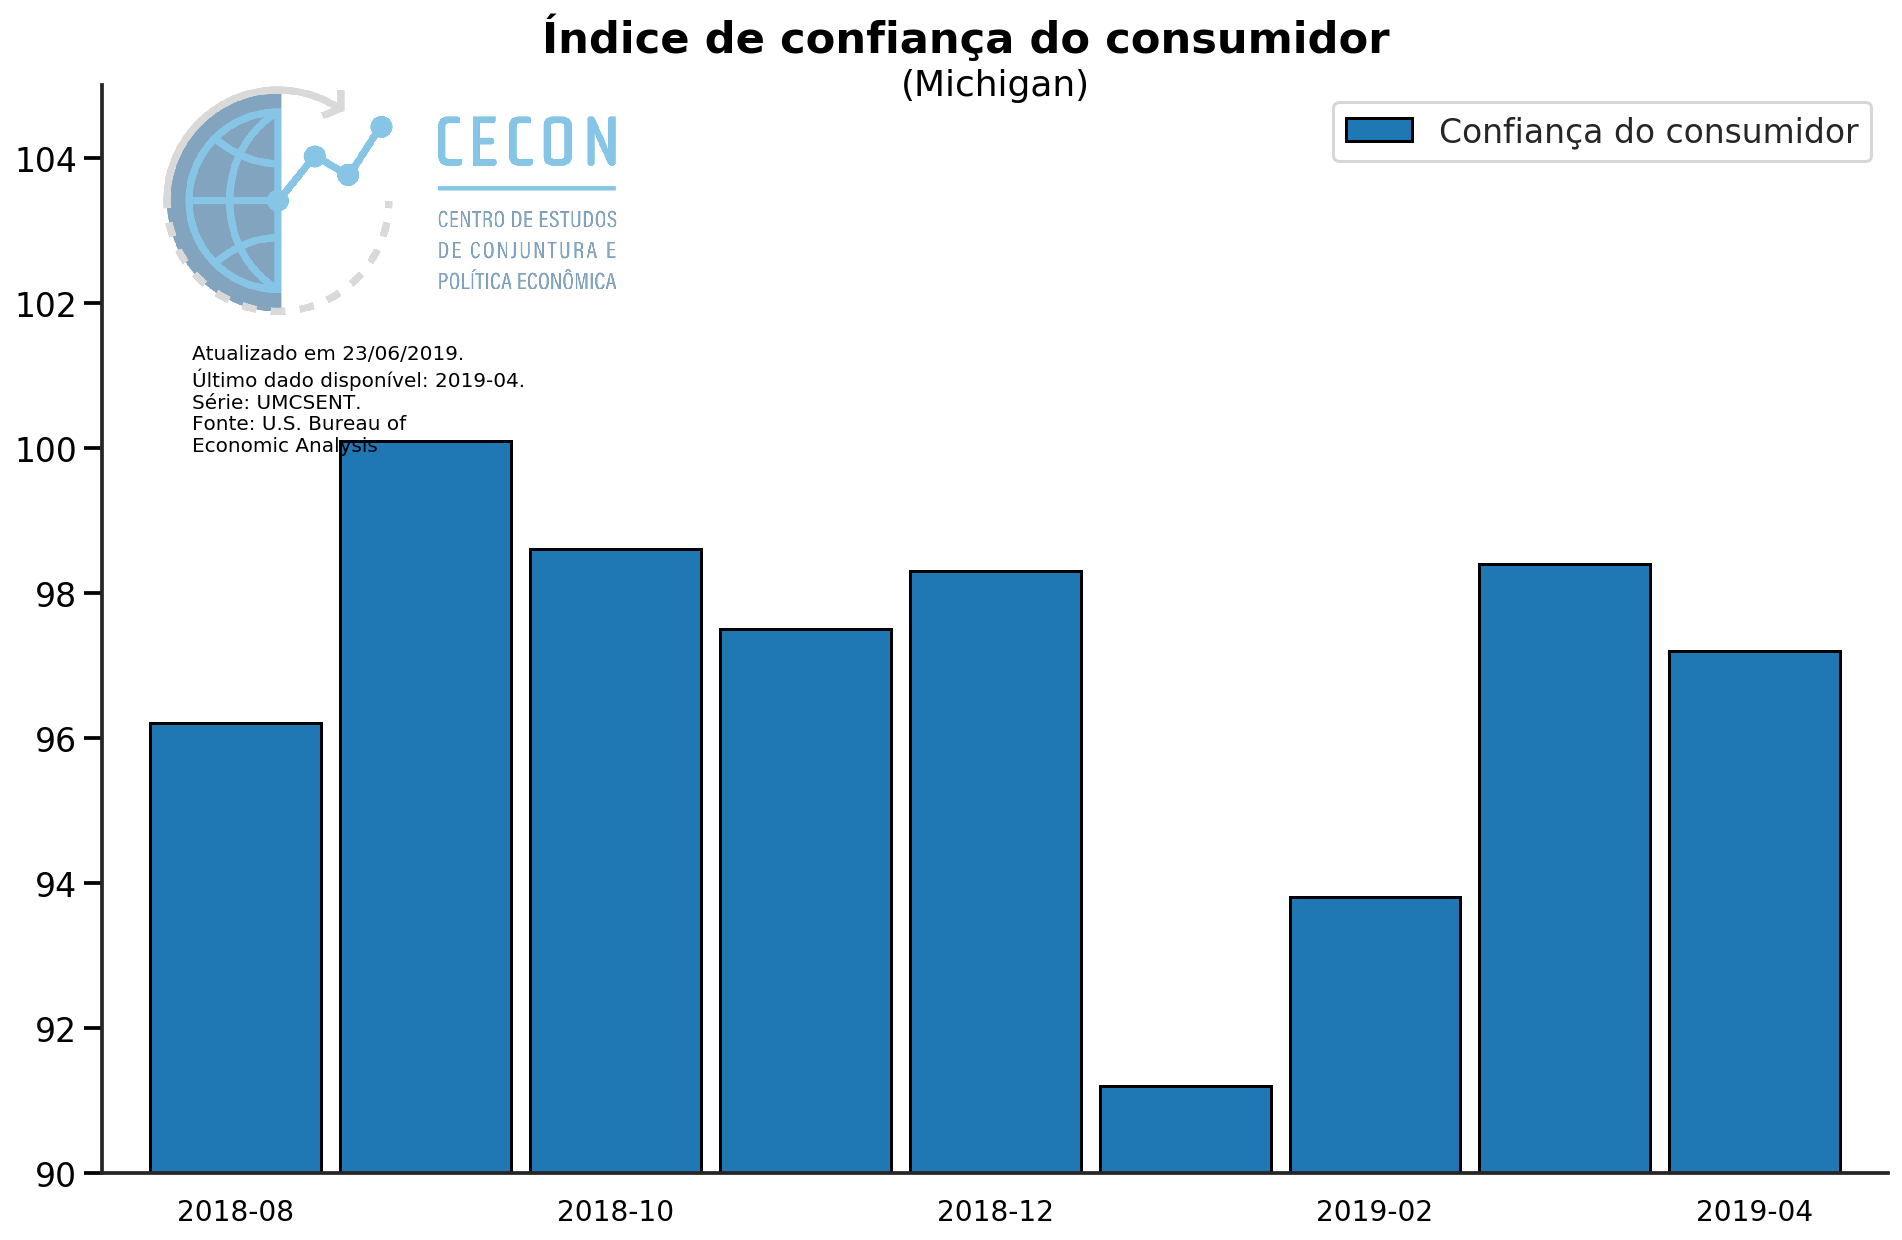

In [16]:
sns.set_context('talk')
fim = 9
periodo = 1
fig, ax = plt.subplots()


df.tail(fim).plot(
    kind = 'bar', 
    ax = ax,
    width = 0.9,
    edgecolor='black',
    figsize=(16,10),
    zorder = 1
)


plt.suptitle(
    'Índice de confiança do consumidor', 
    color='black', 
    weight = 'bold',
    y = .93
)

ax.set_title(
    '(Michigan)', 
    color='black', 
    y = 0.98
)

ax.text(0.05, 
        0.66, 
        'Fonte: U.S. Bureau of \nEconomic Analysis',
        verticalalignment='bottom', 
        horizontalalignment='left',
        transform=ax.transAxes,
        color='black', fontsize=10)
ax.text(
    0.05, 
    0.7,
    'Atualizado em {}. \nÚltimo dado disponível: {}. \nSérie: {}.'.format(
        datetime.datetime.now().strftime("%d/%m/%Y"),
        df.index[-1].to_period('M'),
        "UMCSENT"
    ),
    verticalalignment='bottom',
    horizontalalignment='left',
    transform=ax.transAxes,
    color='black', 
    fontsize=10
)

ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')
ax.yaxis.label.set_color('black')
ax.xaxis.label.set_color('black')

labels = [i.strftime("%Y-%m") for i in df.tail(fim).index]
dates = ["" for i in df.tail(fim).index]

for i in range(len(dates)):
  
  if i%2 == 0:
    dates[i] = labels[i]
    
ax.tick_params(axis='x', which='minor', width = 1)
ax.set_ylim(90,105)

ax.xaxis.set_ticklabels(
    dates, 
    fontsize = 14,
    minor = False,
    rotation = 0,
    color = 'black'
)
ax.xaxis.set_ticks_position('none') 

ax2 = fig.add_axes([0.15,0.7,0.2,0.2])
ax2.imshow(
    logo, 
    aspect='equal',
    zorder=0,
    alpha=.5
)

ax2.axis('off')

sns.despine()
fig.savefig(
    'Confianca_Consumidor.png',
    bbox_inches='tight', 
    dpi = 300,
    pad_inches=0.05
)
plt.show()

# Gastos do governo

# Setor externo

## Conta corrente

In [17]:
df = web.DataReader(
    [
        'GDPC1', # Real GDP
        'NETFI', # Balance on Current Account, NIPA's Billions of Dollars, Seasonally Adjusted Annual Rate
    ],
    'fred',
    start, end
)
df.columns = [
    "PIB real",
    "Saldo Conta Corrente",
]
df['Déficit corrente/PIB'] = -df['Saldo Conta Corrente']/df['PIB real']
df.index.name = ''
df.tail()

PIB real  Saldo Conta Corrente  Déficit corrente/PIB
                                                                 
2018-01-01  18323.963              -513.915              0.028046
2018-04-01  18511.576              -423.790              0.022893
2018-07-01  18664.973              -527.619              0.028268
2018-10-01  18765.256              -544.267              0.029004
2019-01-01  18907.517              -521.819              0.027598

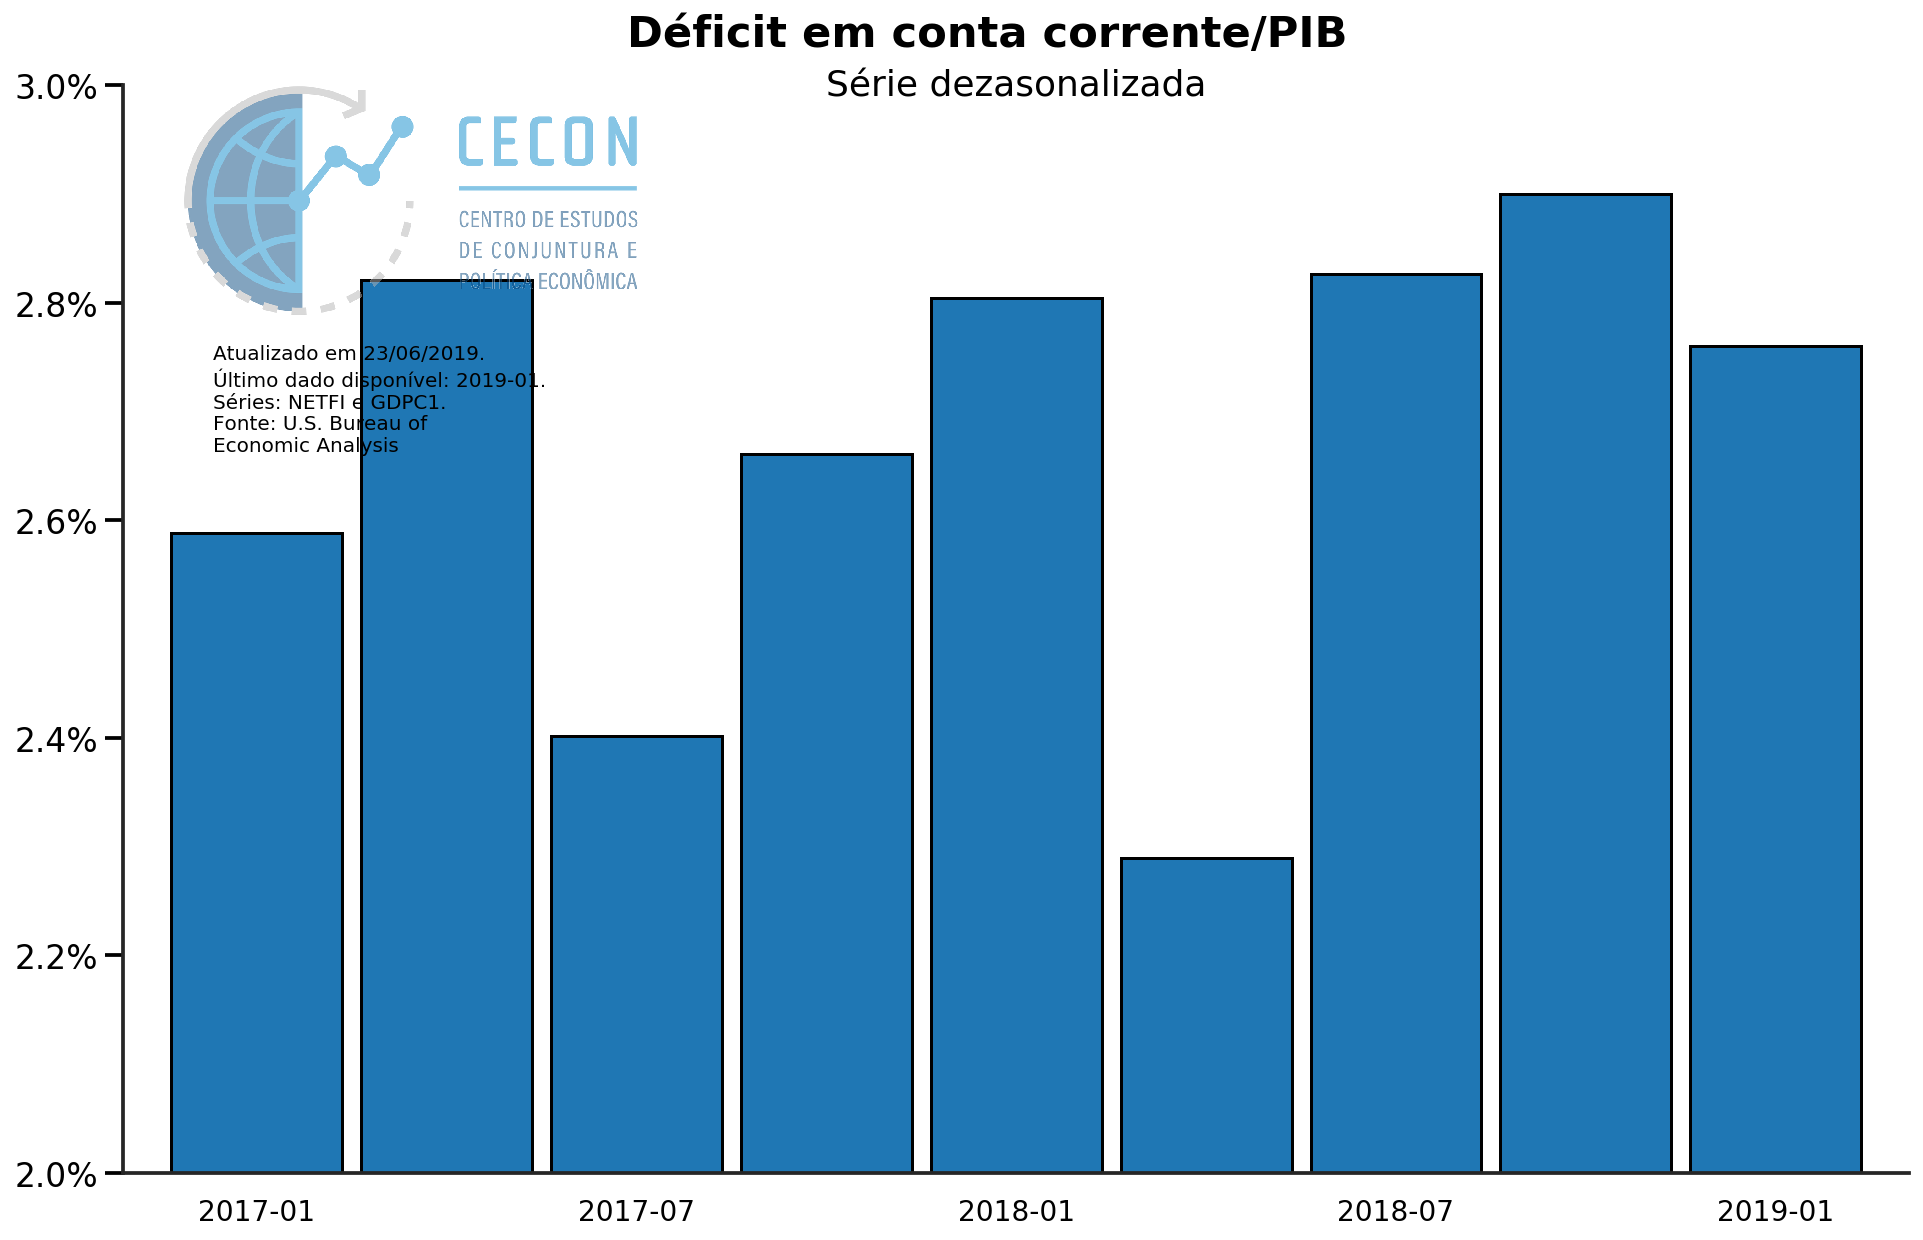

In [18]:
sns.set_context('talk')
fim = 9
periodo = 1
fig, ax = plt.subplots()


df['Déficit corrente/PIB'].tail(fim).plot(
    kind = 'bar', 
    ax = ax,
    width = 0.9,
    edgecolor='black',
    figsize=(16,10),
    zorder = 1
)


plt.suptitle(
    'Déficit em conta corrente/PIB', 
    color='black', 
    weight = 'bold',
    y = .93
)

ax.set_title(
    'Série dezasonalizada', 
    color='black', 
    y = 0.98
)

ax.text(0.05, 
        0.66, 
        'Fonte: U.S. Bureau of \nEconomic Analysis',
        verticalalignment='bottom', 
        horizontalalignment='left',
        transform=ax.transAxes,
        color='black', fontsize=10)
ax.text(
    0.05, 
    0.7,
    'Atualizado em {}. \nÚltimo dado disponível: {}. \nSéries: {}.'.format(
        datetime.datetime.now().strftime("%d/%m/%Y"),
        df.index[-1].to_period('M'),
        "NETFI e GDPC1"
    ),
    verticalalignment='bottom',
    horizontalalignment='left',
    transform=ax.transAxes,
    color='black', 
    fontsize=10
)

ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')
ax.set_ylim(0.02,0.03)
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.1%}'.format(y))) 
ax.yaxis.label.set_color('black')
ax.xaxis.label.set_color('black')

labels = [i.strftime("%Y-%m") for i in df.tail(fim).index]
dates = ["" for i in df.tail(fim).index]

for i in range(len(dates)):
  
  if i%2 == 0:
    dates[i] = labels[i]
    
ax.tick_params(axis='x', which='minor', width = 1)

ax.xaxis.set_ticklabels(
    dates, 
    fontsize = 14,
    minor = False,
    rotation = 0,
    color = 'black'
)
ax.xaxis.set_ticks_position('none') 

ax2 = fig.add_axes([0.15,0.7,0.2,0.2])
ax2.imshow(
    logo, 
    aspect='equal',
    zorder=0,
    alpha=.5
)

ax2.axis('off')

sns.despine()
fig.savefig(
    'Conta_Corrente.png',
    bbox_inches='tight', 
    dpi = 300,
    pad_inches=0.05
)
plt.show()

## Balança comercial

In [19]:
df = web.DataReader(
    [
        'BOPGSTB', # Trade Balance: Goods and Services, Balance of Payments Basis Millions of Dollars, Seasonally Adjusted
    ],
    'fred',
    start, end
)
df["Déficit comercial"] = -df['BOPGSTB']
df.index.name = ''
df["Média móvel"] = df['Déficit comercial'].rolling(12).mean()
df.dropna(inplace=True)
df.tail()

BOPGSTB  Déficit comercial   Média móvel
                                                    
2018-12-01 -60807.0            60807.0  52306.666667
2019-01-01 -52700.0            52700.0  52355.583333
2019-02-01 -50003.0            50003.0  52037.666667
2019-03-01 -51906.0            51906.0  52431.750000
2019-04-01 -50791.0            50791.0  52646.166667

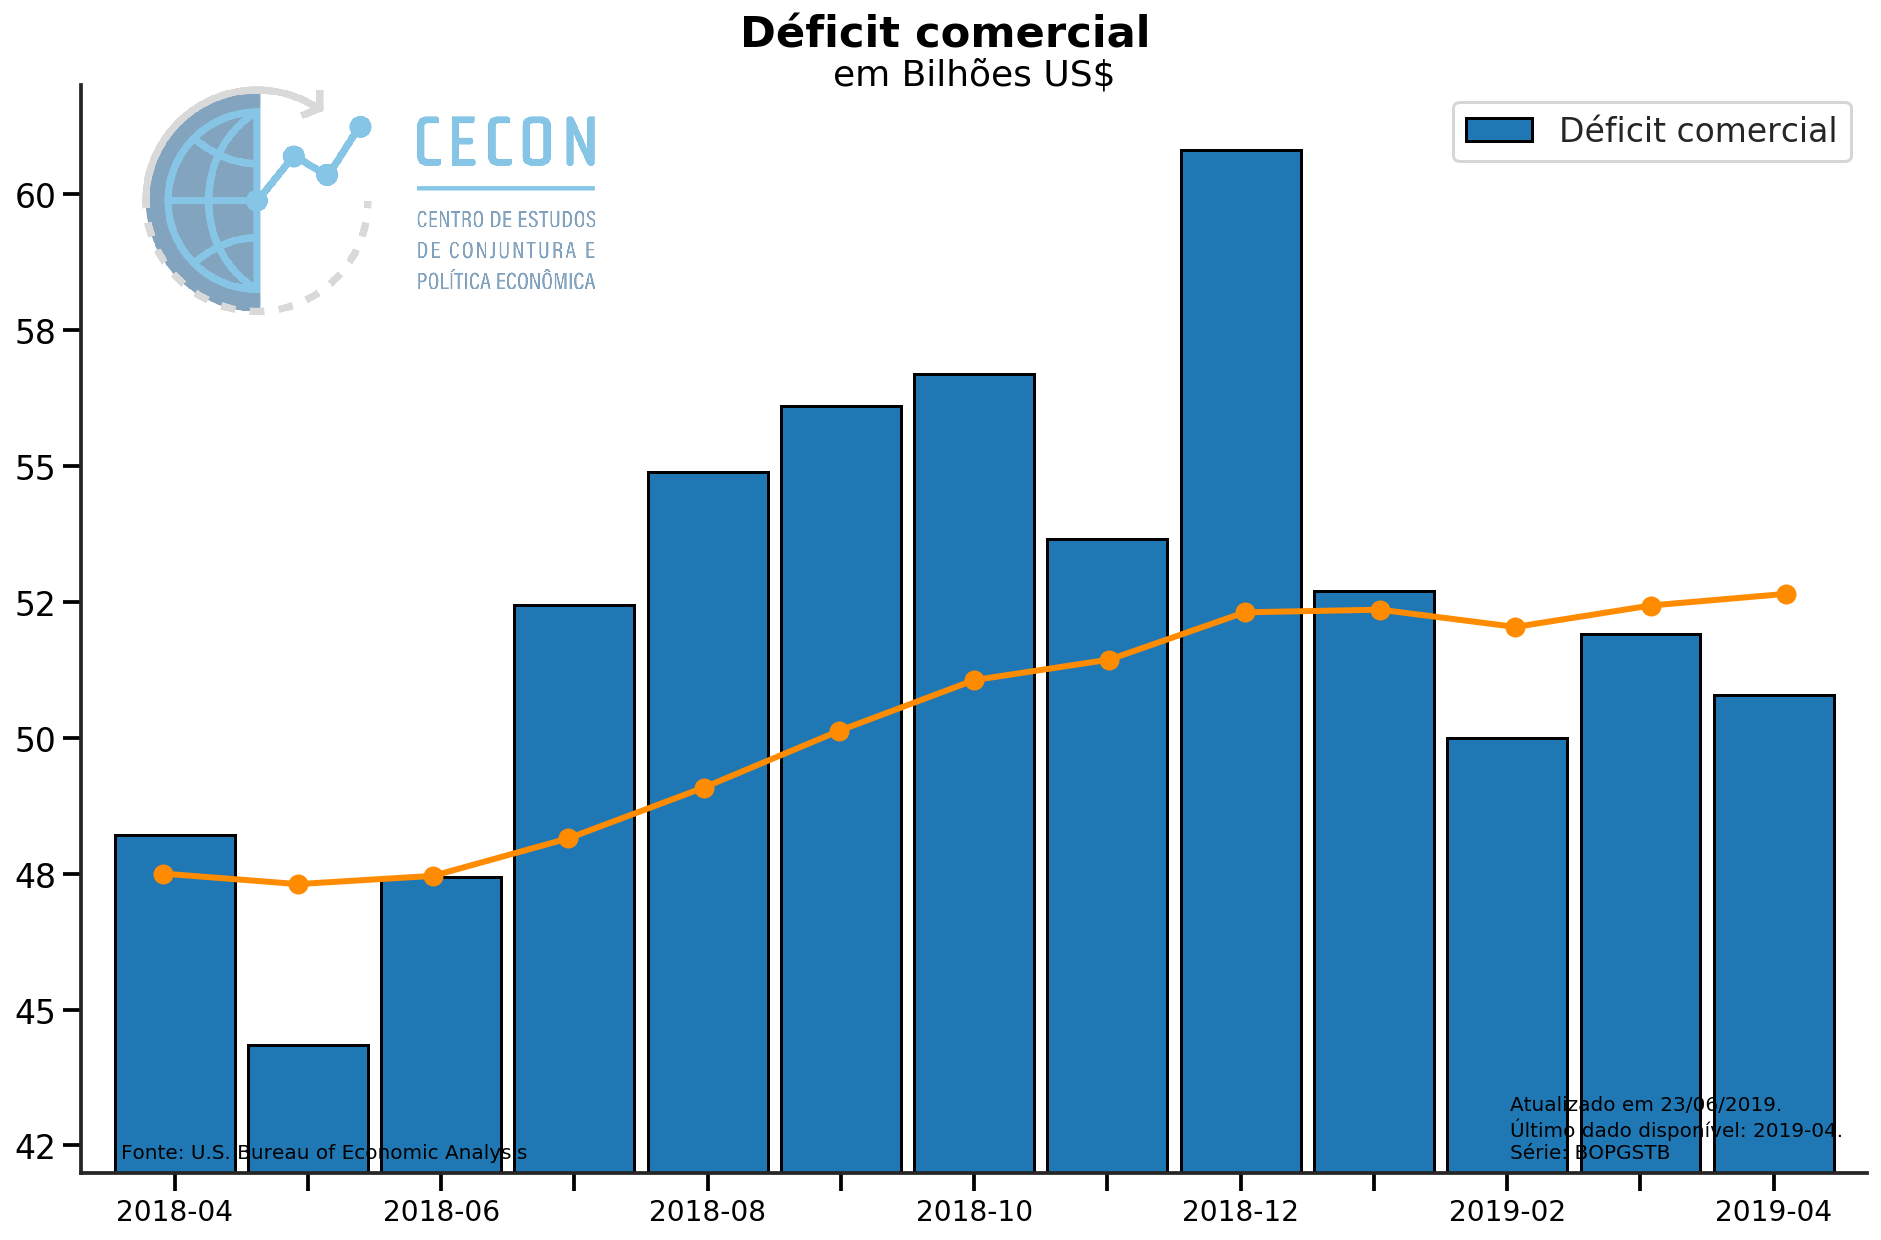

In [20]:
fim = 13
periodo = len(df["2018"])
fig, ax = plt.subplots()

df["Déficit comercial"].tail(fim).plot(
    kind = 'bar', 
    ax = ax,
    width = 0.9,
    edgecolor='black',
    figsize=(16,10),
    zorder = 1
)

axl = ax.twiny()
axl.plot(
    ax.get_xticks(), 
    df["Média móvel"].tail(fim),
    marker='o',
    lw = 3,
    ls = '-',
    color = 'darkorange',
    label = 'Média móvel',
    zorder = 1
)

axl.axis('off')


ax.legend(loc = 'best').set_zorder(0)

plt.suptitle(
    'Déficit comercial', 
    color='black', 
    weight = 'bold',
    y = .93
)

ax.set_title(
    'em Bilhões US\$', 
    color='black', 
    y = .99
)

ax.text(0.25, 
        0.01, 
        'Fonte: U.S. Bureau of Economic Analysis',
        verticalalignment='bottom', 
        horizontalalignment='right',
        transform=ax.transAxes,
        color='black', fontsize=10)
ax.text(
    0.8, 
    0.01,
    'Atualizado em {}. \nÚltimo dado disponível: {}. \nSérie: {}'.format(
        datetime.datetime.now().strftime("%d/%m/%Y"),
        df.index[-1].to_period('M'),
        "BOPGSTB"
    ),
    verticalalignment='bottom',
    horizontalalignment='left',
    transform=ax.transAxes,
    color='black', 
    fontsize=10
)

ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')
ax.yaxis.label.set_color('black')
ax.xaxis.label.set_color('black')
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0f}'.format(y/1000)))

labels = [i.strftime("%Y-%m") for i in df.tail(fim).index]
dates = ["" for i in df.tail(fim).index]

for i in range(len(dates)):
  
  if i%2 == 0:
    dates[i] = labels[i]
    
ax.tick_params(axis='x', which='minor', width = 1)
ax.set_ylim(42000,62000)

ax.xaxis.set_ticklabels(
    dates, 
    fontsize = 14,
    minor = False,
    rotation = 0,
    color = 'black'
)

ax2 = fig.add_axes([0.15,0.7,0.2,0.2])
ax2.imshow(
    logo, 
    aspect='equal',
    zorder=0,
    alpha=.5
)

ax2.axis('off')

sns.despine()
fig.savefig(
    'Deficit_Comercial.png',
    bbox_inches='tight', 
    dpi = 300,
    pad_inches=0.05
)
plt.show()

## Taxa de juros

## Guerra comercial

# Impactos na América Latina

## Política econômica

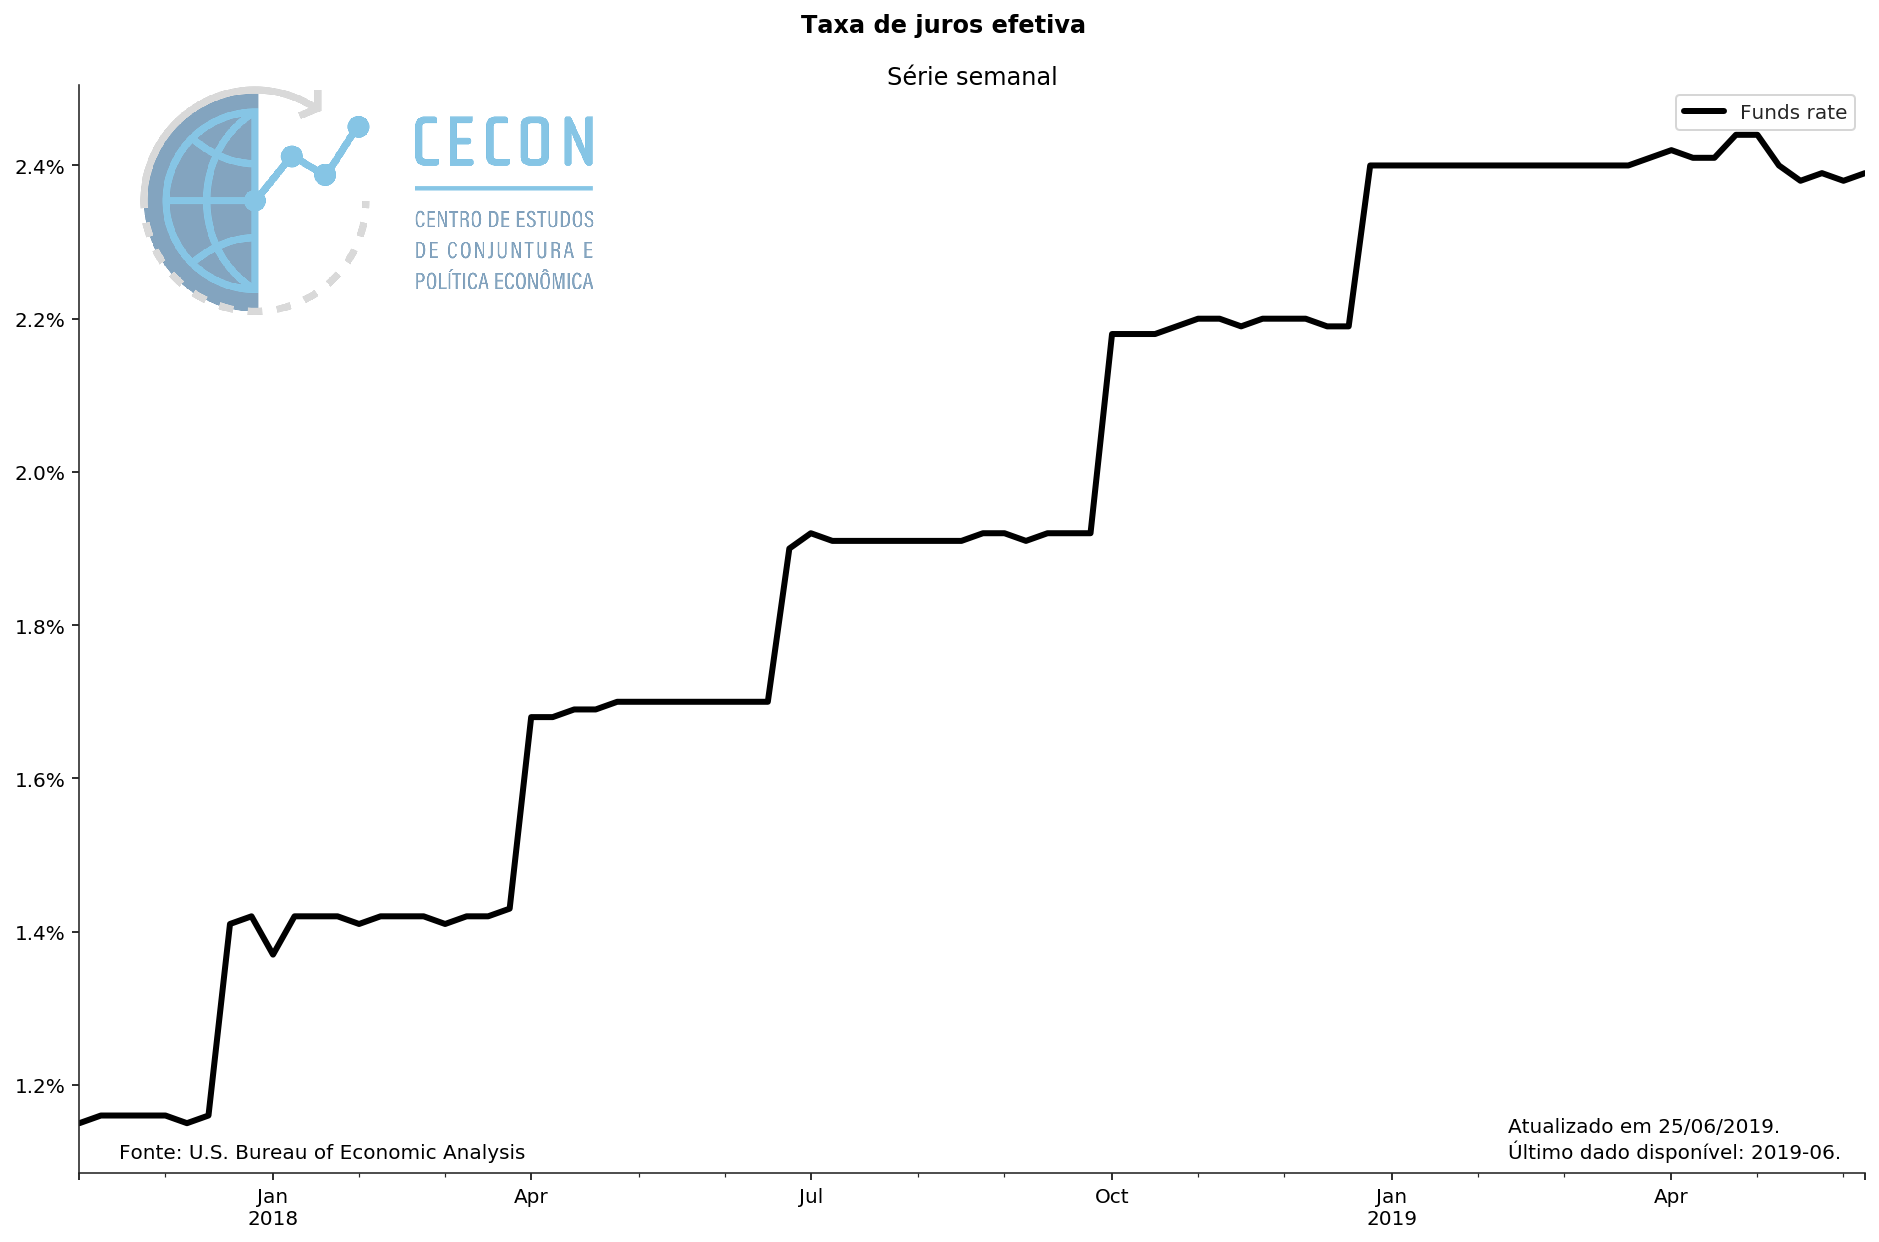

Funds rate
                      
2019-05-12        2.40
2019-05-19        2.38
2019-05-26        2.39
2019-06-02        2.38
2019-06-09        2.39

In [7]:
df = web.DataReader(
    [
        'FF',
    ],
    'fred',
    start, end
)
df.columns = [
    "Funds rate"
]
df = df.dropna()
df.index.name = ''
df = df.resample('W').mean()

fim = 3*4*7
periodo = len(df["2018"])
fig, ax = plt.subplots()

(df/100).tail(fim).plot(
    ax=ax,
    lw=3,
    color='black',
    figsize=(16, 10),
    zorder=1
)

ax.legend(loc='best').set_zorder(0)

plt.suptitle(
    'Taxa de juros efetiva',
    color='black',
    weight='bold',
    y=.93
)

ax.set_title(
    'Série semanal',
    color='black',
    y=.99
)

ax.text(0.25,
        0.01,
        'Fonte: U.S. Bureau of Economic Analysis',
        verticalalignment='bottom',
        horizontalalignment='right',
        transform=ax.transAxes,
        color='black', fontsize=10)
ax.text(
    0.8,
    0.01,
    'Atualizado em {}. \nÚltimo dado disponível: {}.'.format(
        datetime.datetime.now().strftime("%d/%m/%Y"),
        df.index[-1].to_period('M')
    ),
    verticalalignment='bottom',
    horizontalalignment='left',
    transform=ax.transAxes,
    color='black',
    fontsize=10
)

ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')
ax.yaxis.label.set_color('black')
ax.xaxis.label.set_color('black')
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.1%}'.format(y)))

ax.legend(loc='upper right')

ax2 = fig.add_axes([0.15, 0.7, 0.2, 0.2])
ax2.imshow(
    logo,
    aspect='equal',
    zorder=0,
    alpha=.5
)

ax2.axis('off')

sns.despine()
fig.savefig(
    'Funds_Rate.png',
    bbox_inches='tight',
    dpi=300,
    pad_inches=0.05
)
plt.show()
df.tail()

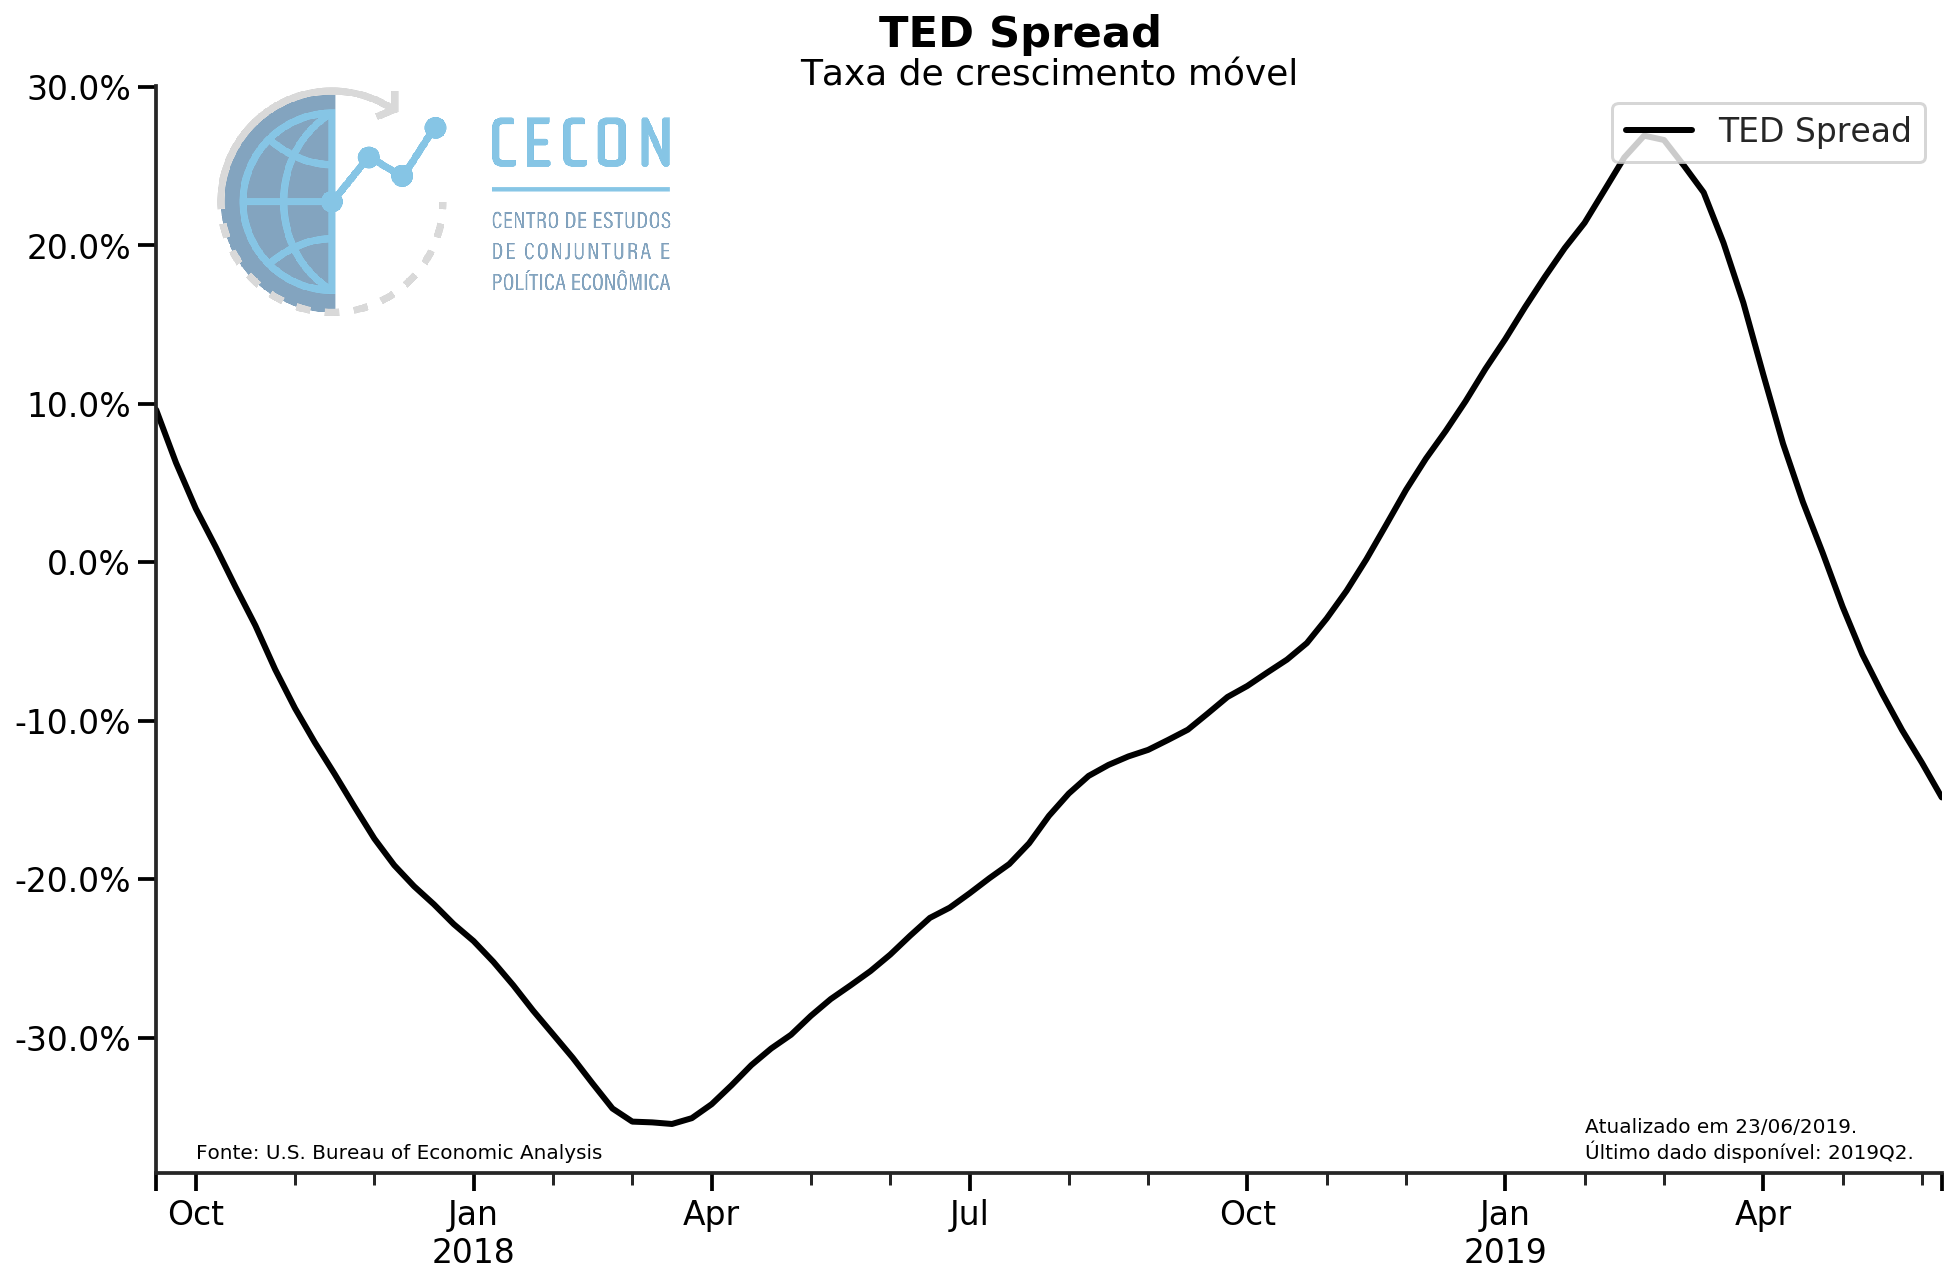

In [22]:
df = web.DataReader(
    [
        'TEDRATE', # New One Family Houses Sold: United States
    ],
    'fred',
    start, end
)
df.columns = [
    "TED Spread"
]
df = df.dropna()
df.index.name = ''
df = df.resample('W').mean()

fim = 13*7
periodo = len(df["2018"])
fig, ax = plt.subplots()

df.rolling(periodo).mean().pct_change(periodo).tail(fim).plot(
    ax = ax,
    lw = 3,
    color = 'black',
    figsize=(16,10),
    zorder = 1
)

ax.legend(loc = 'best').set_zorder(0)

plt.suptitle(
    'TED Spread', 
    color='black', 
    weight = 'bold',
    y = .93
)

ax.set_title(
    'Taxa de crescimento móvel', 
    color='black', 
    y = .99
)

ax.text(0.25, 
        0.01, 
        'Fonte: U.S. Bureau of Economic Analysis',
        verticalalignment='bottom', 
        horizontalalignment='right',
        transform=ax.transAxes,
        color='black', fontsize=10)
ax.text(
    0.8, 
    0.01,
    'Atualizado em {}. \nÚltimo dado disponível: {}.'.format(
        datetime.datetime.now().strftime("%d/%m/%Y"),
        df.index[-1].to_period('Q')
    ),
    verticalalignment='bottom',
    horizontalalignment='left',
    transform=ax.transAxes,
    color='black', 
    fontsize=10
)

ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')
ax.yaxis.label.set_color('black')
ax.xaxis.label.set_color('black')
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.1%}'.format(y))) 

ax.legend(loc = 'upper right')

ax2 = fig.add_axes([0.15,0.7,0.2,0.2])
ax2.imshow(
    logo, 
    aspect='equal',
    zorder=0,
    alpha=.5
)

ax2.axis('off')

sns.despine()
fig.savefig(
    'TED_Spread.png',
    bbox_inches='tight', 
    dpi = 300,
    pad_inches=0.05
)
plt.show()
df.tail()